# Life Expectancy

Statistical Analysis on factors influencing Life Expectancy.

## About Dataset 

### What is Life Expectancy

The term “life expectancy” refers to the number of years a person can expect to live. 
By definition, life expectancy is based on an estimate of the average age members of a particular population group will be when they die.

### Content
The dataset focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well.

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries.
So, the data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of factors, only those critical factors were chosen which are more representative. 

It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. 

## Research's questions and methods

### Question

The main question on which we can concentrate on, is how different socioeconomic factors, immunization-related factors, mortality factors, and economic factors are related and influence life expectancy (our target variable).

We will then go on to view some factors individually in order to answer some questions such as:
- How Adult mortality rates affect life expectancy?
- Does Life Expectancy have positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
- What is the impact of schooling on the lifespan of humans?
- Does Life Expectancy have a positive or negative relationship with drinking alcohol?
- Do densely populated countries tend to have lower life expectancy?
- What is the impact of Immunization coverage on life Expectancy?
- etc...

### Method
We will study this dataset through a **Quantitative Analysis**, since the dataset contains for the most numerical variables. Thus we can reply to quantitative answers, numerical changes in variables and analyze the some phenomena related to life expectancy.
As said before, the final aim is to assess relationship between various factors and life expectancy. 

We will perform:
- **statistical analyses** such as correlation analysis and hypothesis testing
- **machine learning models** (regressions models), to understand whether it is indeed possible to predict life expectancy through the factors available to us 
- **dimensionality reduction**. 

## Importing Modules

In [83]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
import random
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, confusion_matrix
from factor_analyzer import FactorAnalyzer
from plotly.subplots import make_subplots


## Data Cleaning 

In [84]:
# Style and Layout
plt.style.use('default')

### Reading Data

In [85]:
# From the csv file to the datframe
raw_df = pd.read_csv('/Users/emmatosato/Documents/UNI/Magistrale/Social_Research/Life Expectancy Data.csv')
df= raw_df.copy()

### Displaying the dataset and its features

In [86]:
# Showing the first rows
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [87]:
# Size of the dataset
df.shape

(2938, 22)

In [88]:
# Information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Renaming 

Before getting into the variable descriptions, the string values for the columns/variables themselves have to be renamed, in order to be more standardized and clear.

In [89]:
orig_cols = list(df.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
df.columns = new_cols

As stated above it would be useful to change the name of the variable thinness_1-19_years to thinness_10-19_years as it is a more accurate depiction of what the variable means.

In [90]:
df.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)

### Columns Meaning

What does the variable mean and what type of variable is it (Nominal/Ordinal/Interval/Ratio)?

In [91]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

- country (Nominal) - the country in which the indicators are from (i.e. United States of America or Congo)
- year (Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)
- status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards
- life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year
- adult_mortality (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is - infant_deaths (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants
- alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita
- percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)
- hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population
- measles (Ratio) - number of reported Measles cases per 1000 population
- bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population
- under-five_deaths (Ratio) - number of people under the age of five deaths per 1000 population
- polio (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population
- total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure
- diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds
- hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births
- gdp (Ratio) 
    - Gross Domestic Product per capita
    - the standard measure of the value added created through the production of goods and services in a country during a certain period
- population (Ratio) - population of a country
- thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more accurately represent the variable)
- thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9
- income_composition_of_resources (Ratio) 
    - Human Development Index in terms of income composition of resources (index ranging from 0 to 1) 
    - ICOR measures how good a country is at utilizing its resources. 
    - The HDI is a summary composite measure of a country's average achievements in three basic aspects of human development: health, knowledge and standard of living. 

- schooling (Ratio) - average number of years of schooling of a population

### No sense values handling

In [92]:
# Descriptive statistics about the dataset
df.describe()

year  life_expectancy  adult_mortality  infant_deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           alcohol  percentage_expenditure  hepatitis_b        measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               bmi  under-five_deaths        polio  total_expenditure  \
count  2904.000000        2938.000000  2919.000000         2712.00000   
mean     38.321247          42.035739    82.550188            5.93819   
std      20.044034         160.445548    23.428046            2.49832   
min       1.000000           0.000000     3.000000            0.37000   
25%      19.300000           0.000000    78.000000            4.26000   
50%      43.500000           4.000000    93.000000            5.75500   
75%      56.200000          28.000000    97.000000            7.49250   
max      87.300000        2500.000000    99.000000           17.60000   

        diphtheria     hiv/aids            gdp    population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness_10-19_years  thinness_5-9_years  \
count           2904.000000         2904.000000   
mean               4.839704            4.870317   
std                4.420195            4.508882   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.300000            3.300000   
75%                7.200000            7.200000   
max               27.700000           28.600000   

       income_composition_of_resources    schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

Things that may not make sense from above:

- Adult mortality of 1? This is likely an error in measurement, but what values make sense here? May need to change to null if under a certain threshold.
- Infant deaths as low as 0 per 1000? That just isn't plausible - I'm deeming those values to actually be null. Also on the other end 1800 is likely an outlier, but it is possible in a country with very high birthrates and perhaps a not very high population total - this can be dealt with later.
- BMI of 1 and 87.3? A BMI of 15 or lower is seriously underweight and a BMI of 40 or higher is morbidly obese, therefore a large number of these measurements just seem unrealistic.
- Under Five Deaths, similar to infant deaths just isn't likely (perhaps even impossible) to have values at zero.
- GDP per capita as low as 1.68 (USD) possible? Perhaps this low values are outliers.
- Population of 34 for an entire country? Impossibile.

There are a few of the above that could simply be outliers, but there are some that almost certainly have to be errors of some sort. Of the above variables, changes to **null value** (i will handle them later) will be made for the following since these numbers don't make any sense:

1. Adult mortality rates lower than the 5th percentile
2. Infant deaths of 0 
3. BMI less than 10 and greater than 50
4. Under Five deaths of 0

In [93]:
mort_5_percentile = np.percentile(df['adult_mortality'].dropna(), 5)
df.adult_mortality = df.apply(lambda x: np.nan if x.adult_mortality < mort_5_percentile else x.adult_mortality, axis=1)
df.infant_deaths = df.infant_deaths.replace(0, np.nan)
df.bmi = df.apply(lambda x: np.nan if (x.bmi < 10 or x.bmi > 50) else x.bmi, axis=1)
df['under-five_deaths'] = df['under-five_deaths'].replace(0, np.nan)

### Null-values Handling 

In [94]:
# Checking for Null Values
df.isnull().sum()

country                               0
year                                  0
status                                0
life_expectancy                      10
adult_mortality                     155
infant_deaths                       848
alcohol                             194
percentage_expenditure                0
hepatitis_b                         553
measles                               0
bmi                                1456
under-five_deaths                   785
polio                                19
total_expenditure                   226
diphtheria                           19
hiv/aids                              0
gdp                                 448
population                          652
thinness_10-19_years                 34
thinness_5-9_years                   34
income_composition_of_resources     167
schooling                           163
dtype: int64

Since half of the BMI variable's values are null, it's better to remove this variable.

In [95]:
# Dropping a column
df.drop(columns='bmi', inplace=True)

There are a lot of columns containing null values, since this is time series data assorted by country, the best course of action would be to interpolate the data by country. However, when attempting to interpolate by country it doesn't fill in any values as the countries' data for all the null values are null for each year. Therefore imputation before by country, and after year, may be the best possible method here.

In [96]:
# Finally interopolation by mean for remaining null values.
# By country
imputed_data = []
for country in list(df.country.unique()):
    country_data = df[df.country == country].copy()
    for col in list(country_data.columns)[3:]:
        country_data[col] = country_data[col].fillna(country_data[col].dropna().mean()).copy()
    imputed_data.append(country_data)
df = pd.concat(imputed_data).copy()

# By Year
imputed_data = []
for year in list(df.year.unique()):
    year_data = df[df.year == year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
    imputed_data.append(year_data)
df = pd.concat(imputed_data).copy()

In [97]:
# Checking againg
df.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_10-19_years               0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

### Outliers handling 

#### Outliers Detection

First a boxplot and histogram will be created for each continuous variable in order to visually see if outliers exist.

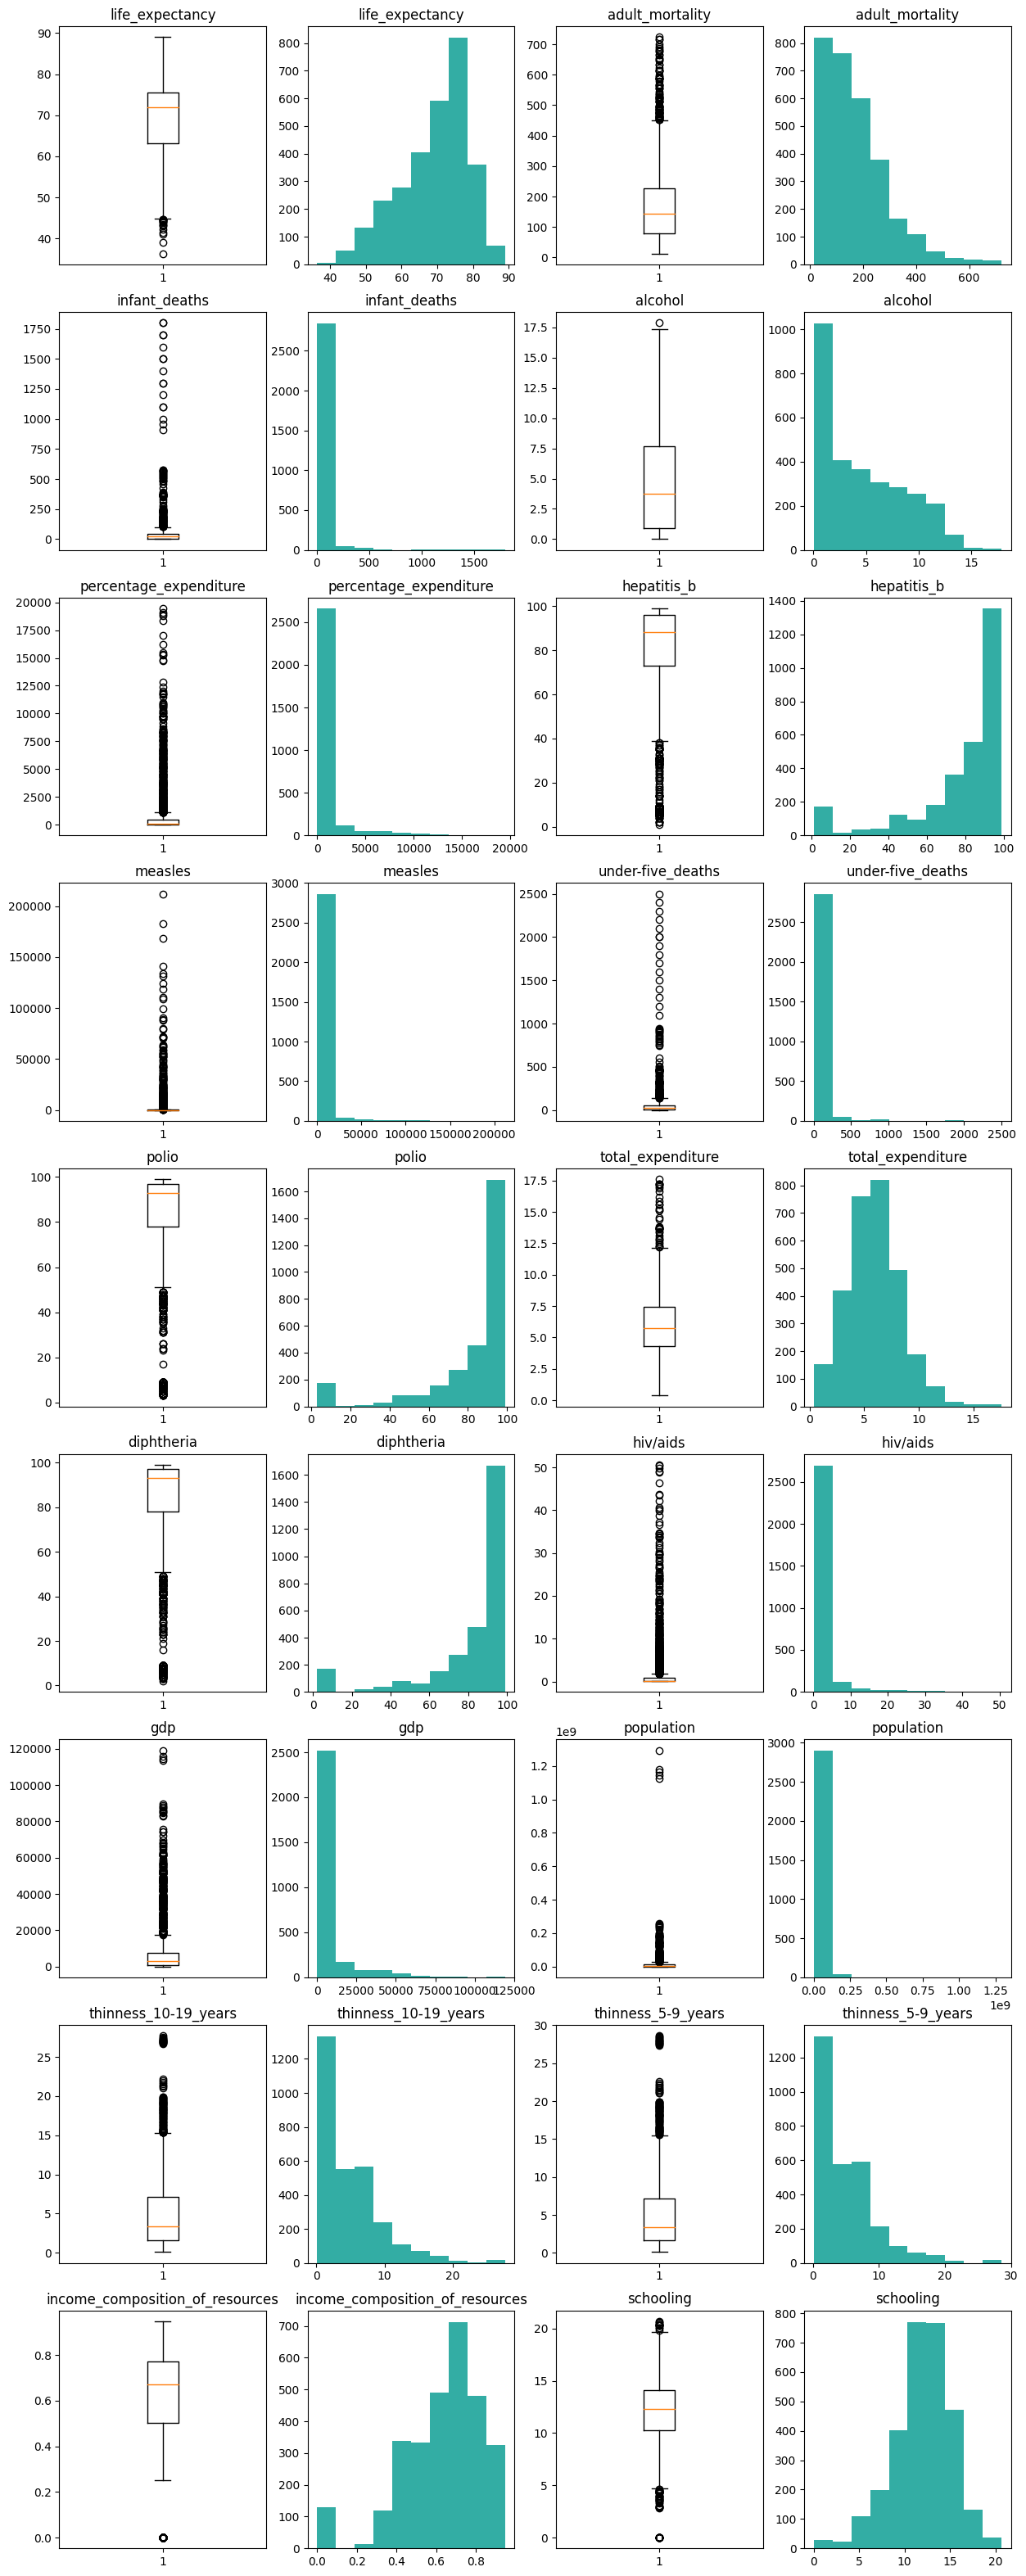

In [98]:
cont_vars = list(df.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{}'.format(col))
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col], color = '#33ADA4')
        plt.title('{}'.format(col))
    plt.show()
outliers_visual(df)

Visually, it is plain to see that there are a number of outliers for all of these variables - including the target variable, life expectancy.

#### Dealing with outliers

Since each variable has a unique amount of outliers, the best route to take is probably *winsorizing (limiting)* the values for each variable on its own until no outliers remain.

***What does it mean to winsorize data?*** 
For example, a 90% winsorization sets all observations greater than the 95th percentile equal to the value at the 95th percentile and all observations less than the 5th percentile equal to the value at the 5th percentile. 
In effect, to winsorize data means to change extreme values in a dataset to less extreme values

In [99]:
wins_dict = {}

def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

In [100]:
wins_dict = {}

def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

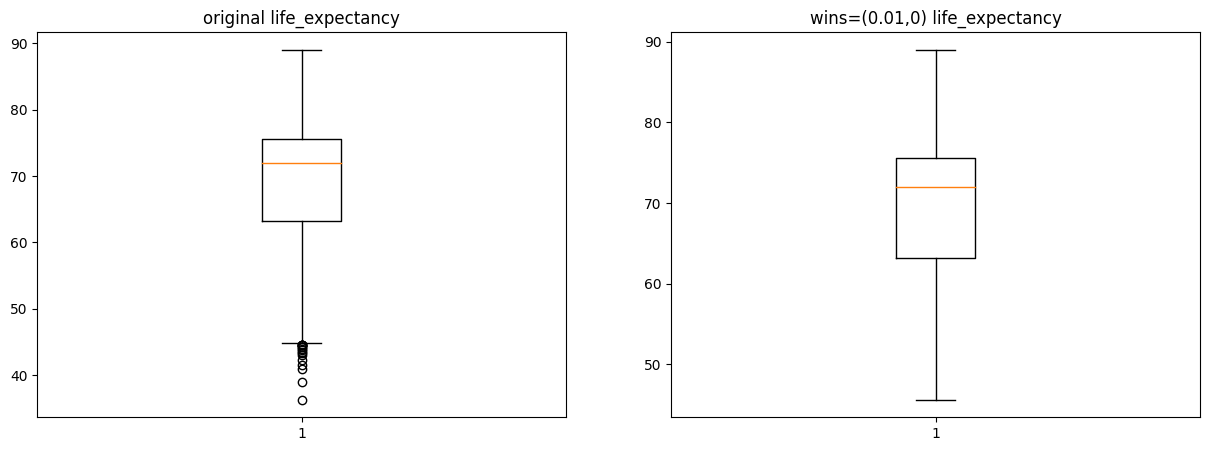

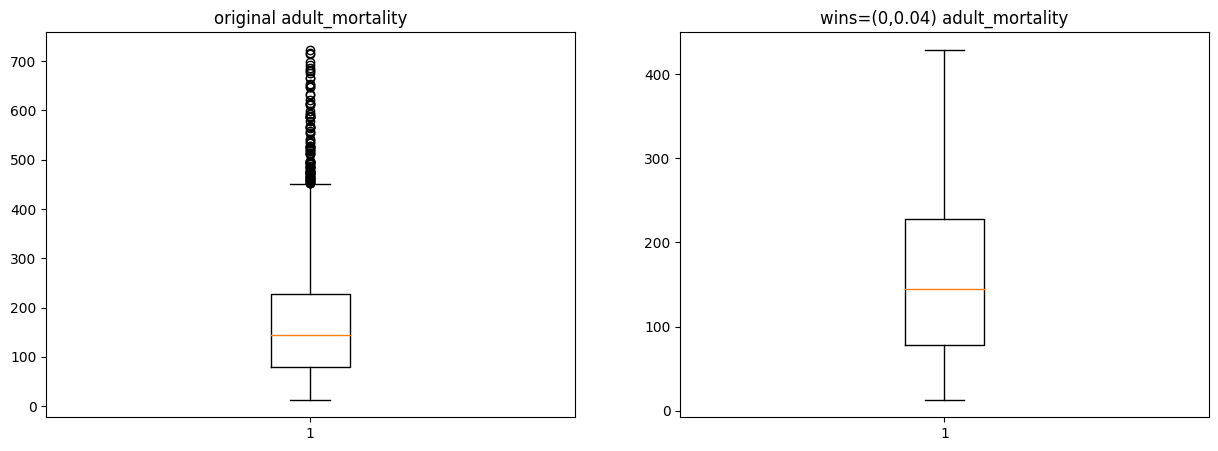

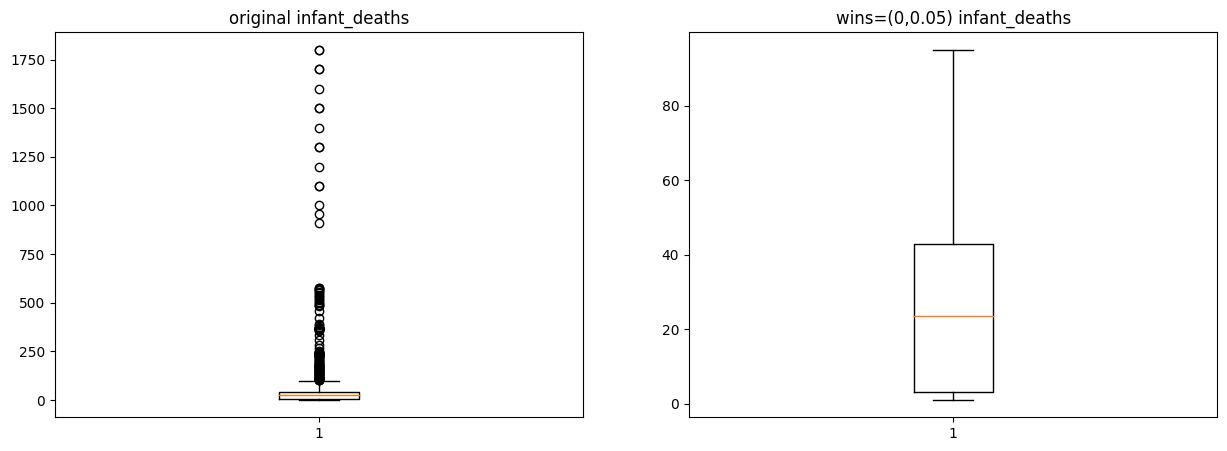

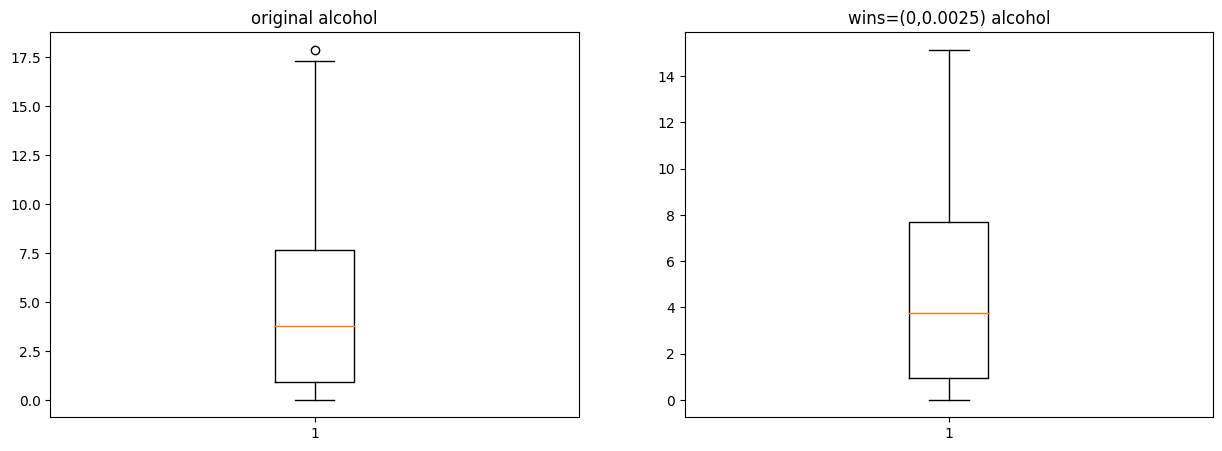

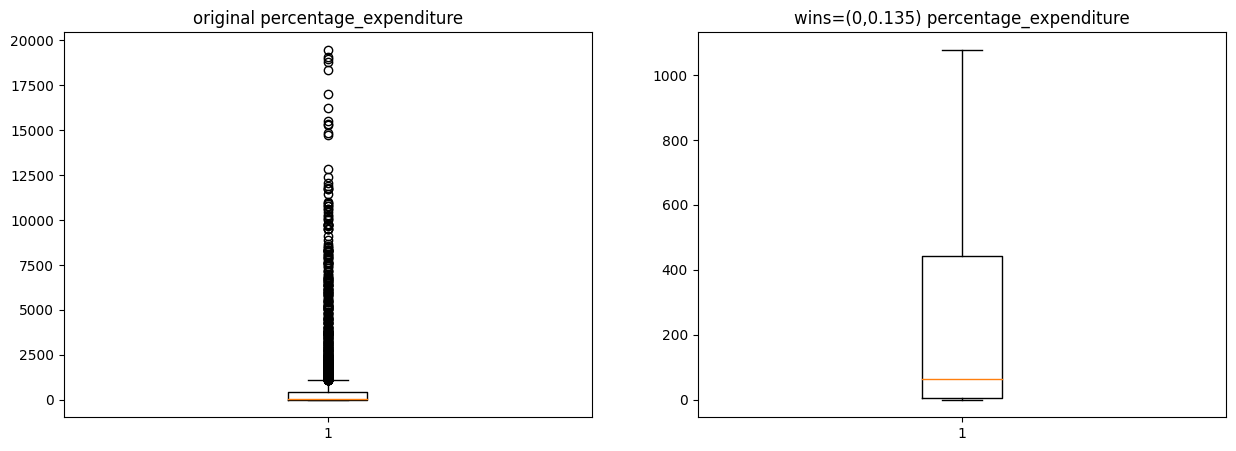

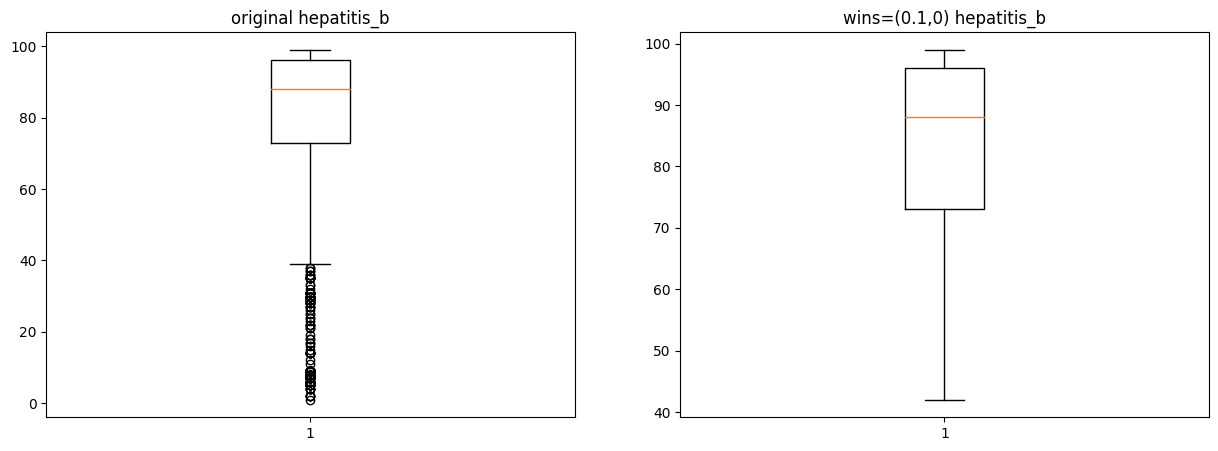

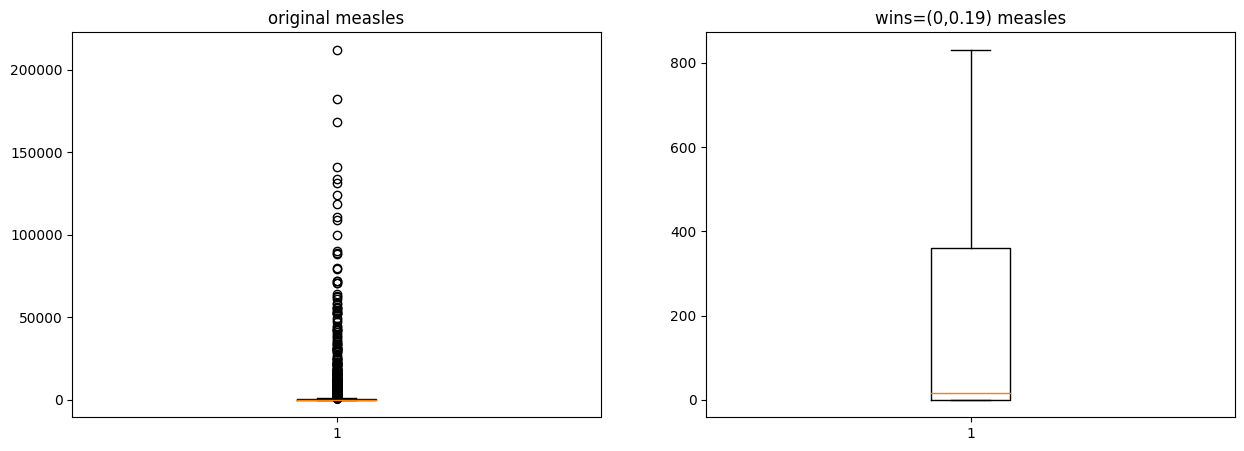

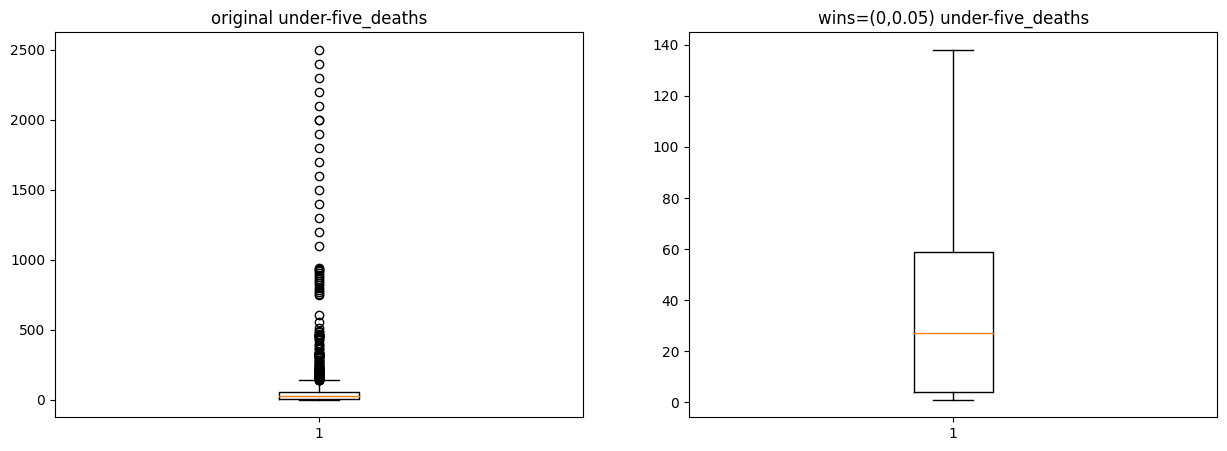

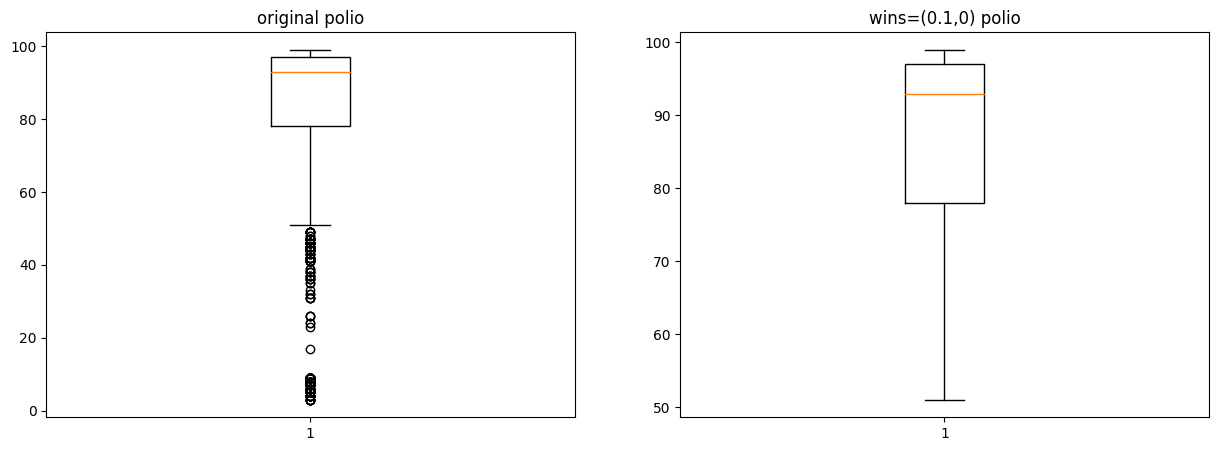

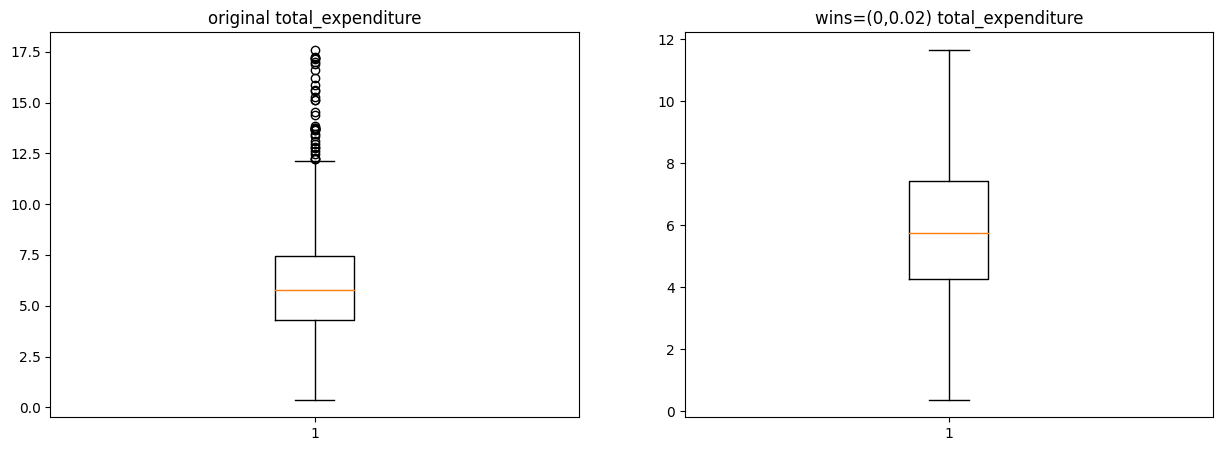

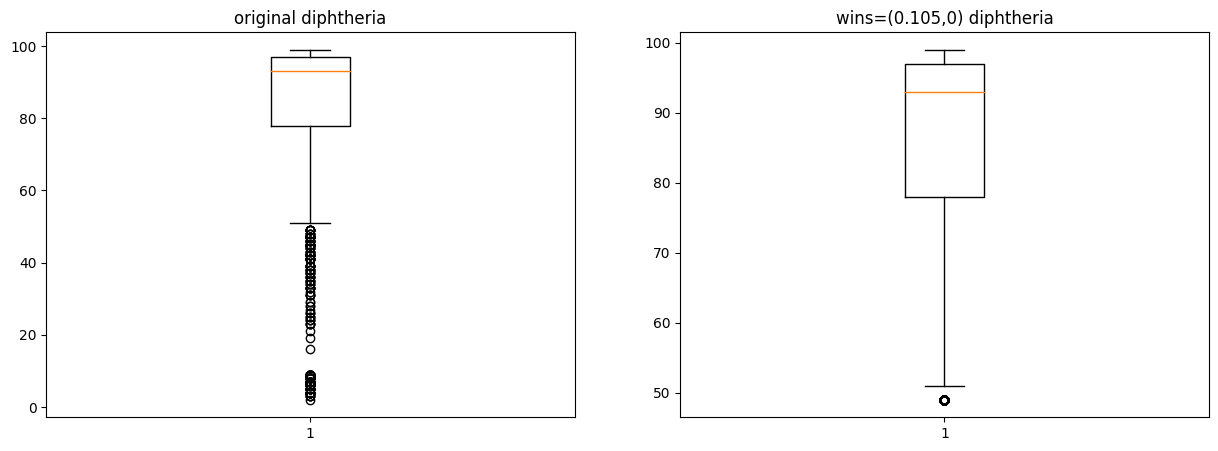

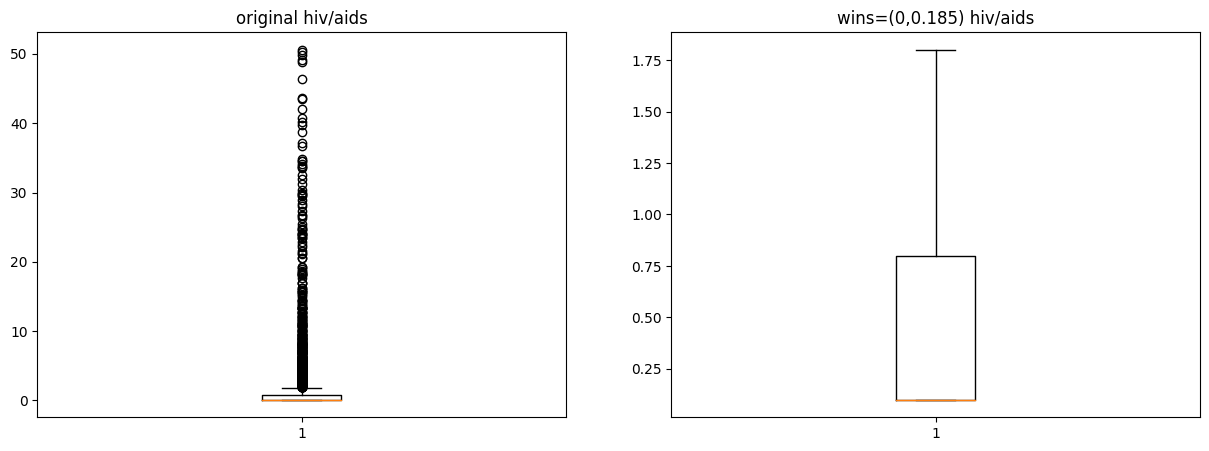

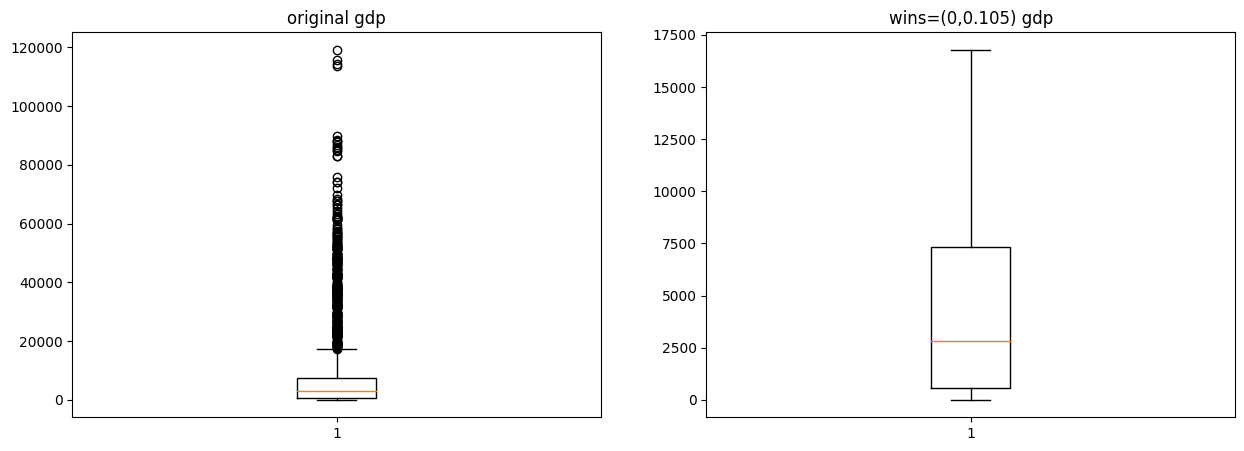

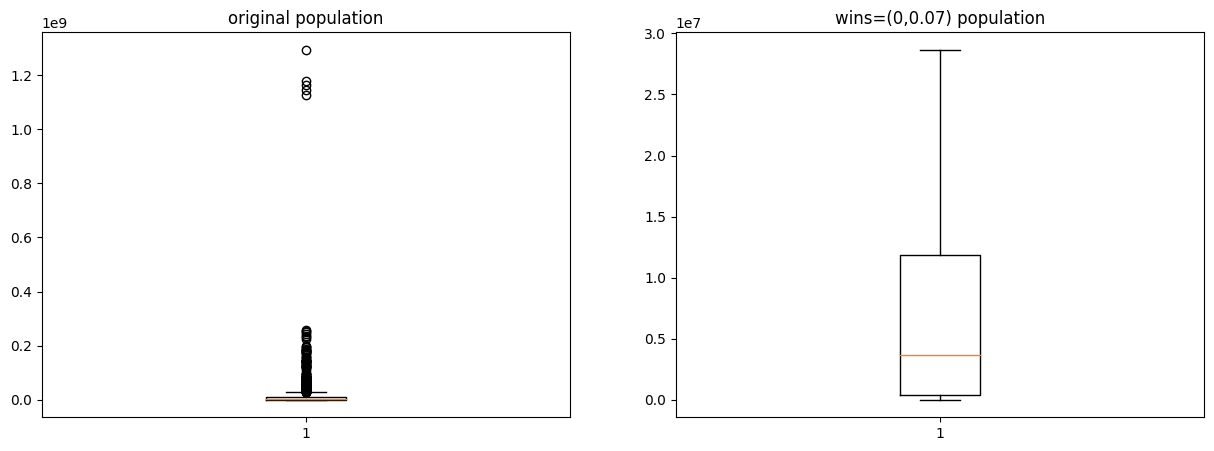

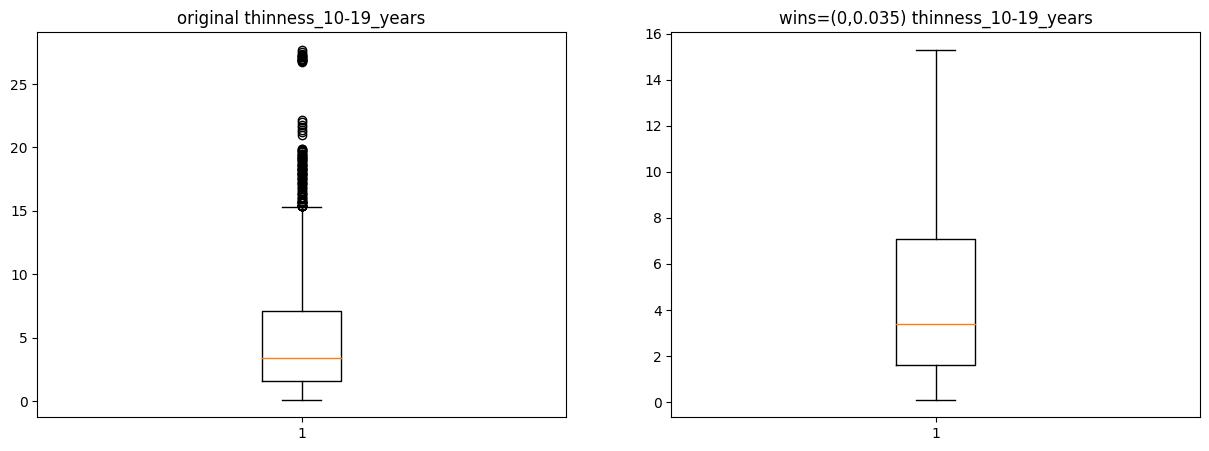

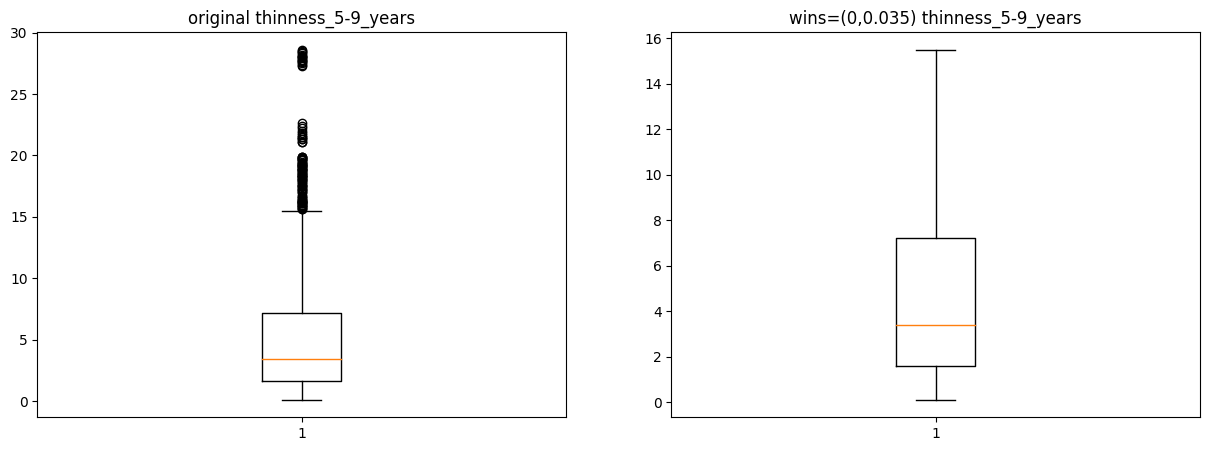

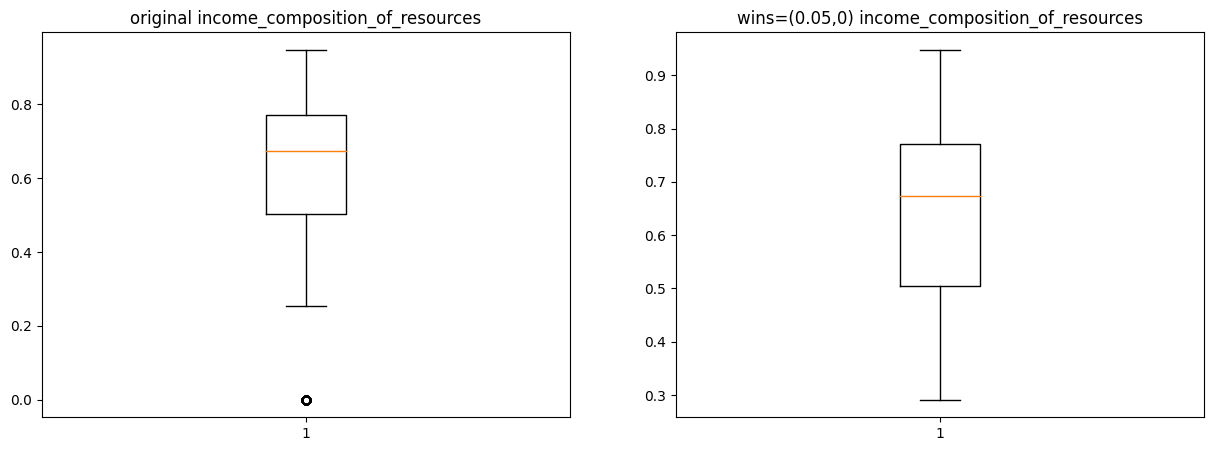

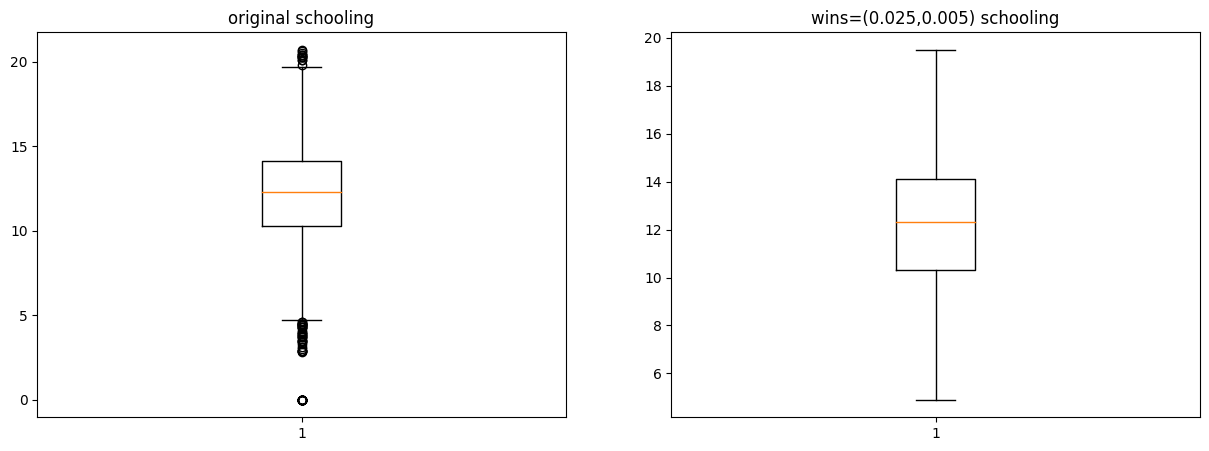

In [101]:
test_wins(cont_vars[0], lower_limit=.01, show_plot=True)
test_wins(cont_vars[1], upper_limit=.04, show_plot=True)
test_wins(cont_vars[2], upper_limit=.05, show_plot=True)
test_wins(cont_vars[3], upper_limit=.0025, show_plot=True)
test_wins(cont_vars[4], upper_limit=.135, show_plot=True)
test_wins(cont_vars[5], lower_limit=.1, show_plot=True)
test_wins(cont_vars[6], upper_limit=.19, show_plot=True)
test_wins(cont_vars[7], upper_limit=.05, show_plot=True)
test_wins(cont_vars[8], lower_limit=.1, show_plot=True)
test_wins(cont_vars[9], upper_limit=.02, show_plot=True)
test_wins(cont_vars[10], lower_limit=.105, show_plot=True)
test_wins(cont_vars[11], upper_limit=.185, show_plot=True)
test_wins(cont_vars[12], upper_limit=.105, show_plot=True)
test_wins(cont_vars[13], upper_limit=.07, show_plot=True)
test_wins(cont_vars[14], upper_limit=.035, show_plot=True)
test_wins(cont_vars[15], upper_limit=.035, show_plot=True)
test_wins(cont_vars[16], lower_limit=.05, show_plot=True)
test_wins(cont_vars[17], lower_limit=.025, upper_limit=.005, show_plot=True)

All the variables have now been winsorized as little as possible in order to keep as much data intact as possible while still being able to eliminate the outliers. 
However, in some cases the distributions are still disproportionate. With a better knowledge of this statistical method, the winsorization could be more effective, 
but for the level at which i am conducting this study, i prefer to mantein the dataset as true to the original as possible.\n
         
Thus keep in mind that in several cases the data are not very attendable.

A new dataframe with the winsorized values 

In [102]:
# Creating the dataframe
wins_df = df.iloc[:, 0:3]
for col in cont_vars:
    wins_df[col] = wins_dict[col]

wins_df.sort_index(inplace= True)

We can see the distribution of our features after the winsorization.

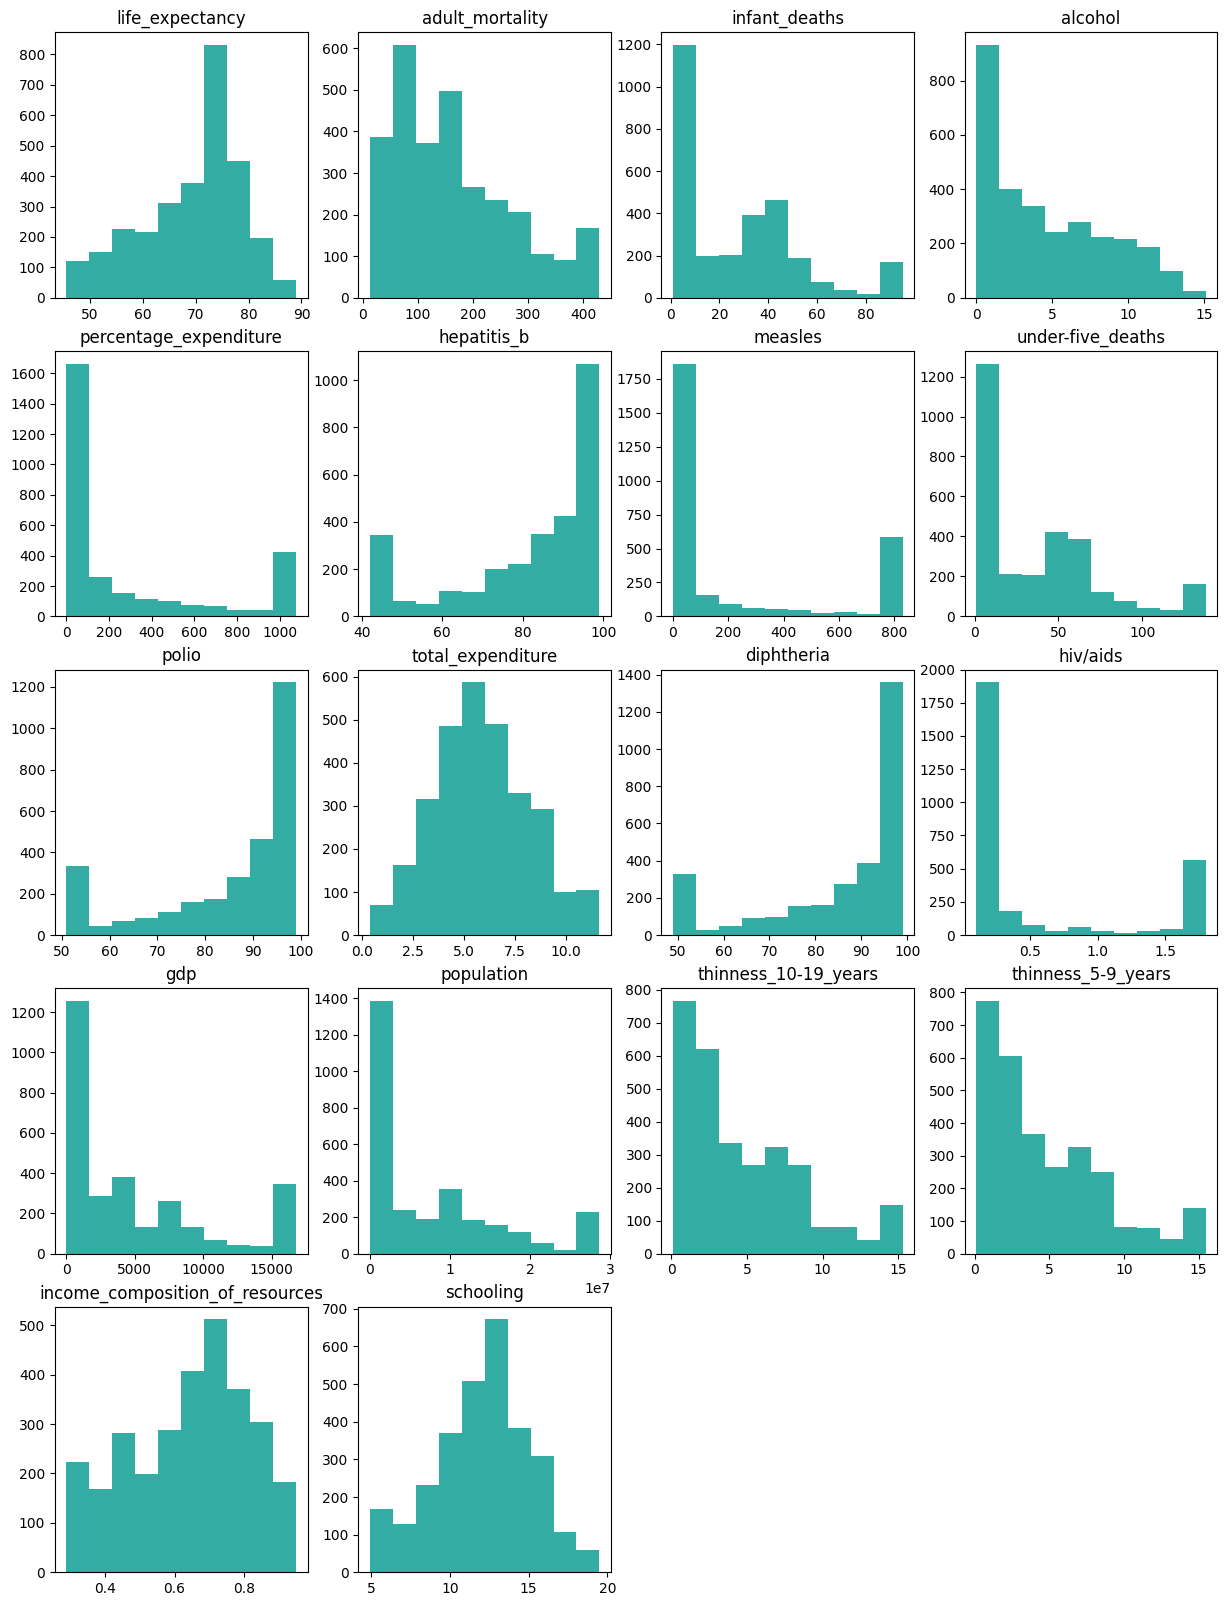

In [103]:
# Starting from the third column because it's more signficant and bceause the status has already been analyzed
cont_vars = list(wins_df.columns)[3:]

plt.figure(figsize=(15, 20))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(5, 4, i)
    plt.hist(wins_df[col], color = '#33ADA4')
    plt.title(col)

## Data Exploration and Feature Engineering

### Univariate Analysis 

#### Descriptive Statistics

In [104]:
# Descriptive statistics of continuous variables.
wins_df.describe()

year  life_expectancy  adult_mortality  infant_deaths  \
count  2938.000000      2938.000000      2938.000000    2938.000000   
mean   2007.518720        69.248795       165.530874      27.081105   
std       4.613841         9.462136       109.776517      25.850486   
min    2000.000000        45.600000        13.000000       1.000000   
25%    2004.000000        63.200000        78.692308       3.000000   
50%    2008.000000        72.000000       145.000000      23.500000   
75%    2012.000000        75.600000       228.000000      42.823529   
max    2015.000000        89.000000       429.000000      95.000000   

           alcohol  percentage_expenditure  hepatitis_b      measles  \
count  2938.000000             2938.000000  2938.000000  2938.000000   
mean      4.597285              281.501093    81.100399   220.691287   
std       4.017850              384.161450    18.464860   329.192321   
min       0.010000                0.000000    42.000000     0.000000   
25%       0.930000                4.685343    73.000000     0.000000   
50%       3.775000               64.912906    88.000000    17.000000   
75%       7.677500              441.534144    96.000000   360.250000   
max      15.140000             1077.712092    99.000000   831.000000   

       under-five_deaths        polio  total_expenditure   diphtheria  \
count        2938.000000  2938.000000        2938.000000  2938.000000   
mean           37.371262    85.303686           5.883895    85.049499   
std            37.899100    15.630623           2.337742    16.056086   
min             1.000000    51.000000           0.370000    49.000000   
25%             4.000000    78.000000           4.280000    78.000000   
50%            27.000000    93.000000           5.760000    93.000000   
75%            58.731884    97.000000           7.430000    97.000000   
max           138.000000    99.000000          11.660000    99.000000   

          hiv/aids           gdp    population  thinness_10-19_years  \
count  2938.000000   2938.000000  2.938000e+03           2938.000000   
mean      0.526991   4931.339011  7.486953e+06              4.703351   
std       0.675962   5407.915513  8.639918e+06              3.925702   
min       0.100000      1.681350  3.400000e+01              0.100000   
25%       0.100000    562.082880  4.189172e+05              1.600000   
50%       0.100000   2834.764218  3.625718e+06              3.400000   
75%       0.800000   7316.984298  1.181332e+07              7.100000   
max       1.800000  16784.346160  2.865628e+07             15.300000   

       thinness_5-9_years  income_composition_of_resources    schooling  
count         2938.000000                      2938.000000  2938.000000  
mean             4.720470                         0.640659    12.049874  
std              3.964268                         0.171622     3.085673  
min              0.100000                         0.291000     4.900000  
25%              1.600000                         0.504250    10.300000  
50%              3.400000                         0.673000    12.300000  
75%              7.200000                         0.772000    14.100000  
max             15.500000                         0.948000    19.500000

In [105]:
# Descriptive statistics of categorical variables.
wins_df.describe(include='O')

country      status
count          2938        2938
unique          193           2
top     Afghanistan  Developing
freq             16        2426

#### Life expectancy distribution

In [106]:
fig=px.histogram(wins_df ,x='life_expectancy', color_discrete_sequence= ['#33ADA4'])
fig.show()

#### Choropleth map

In [107]:
selected_feature = 'polio'

# Create the choropleth map with animation
fig = px.choropleth(
    wins_df.sort_values(by='year'),
    locations='country',
    locationmode='country names',
    color=selected_feature,
    hover_name='country',
    animation_frame='year',  
    color_continuous_scale='Tealrose',  
    projection='natural earth',
    range_color=[wins_df[selected_feature].min(), wins_df[selected_feature].max()]  # Set the fixed color range
)


# Update layout settings
fig.update_layout(
    title='Life Expectancy by Country Over Time',
    geo=dict(
        showframe=False,  # Hide country borders
        showcoastlines=False,  # Hide coastlines
        projection_type='equirectangular'  # Choose a map projection
    )
)


# Show the choropleth map
fig.show()

#### Developed vs developing countries counts

<AxesSubplot: xlabel='count', ylabel='status'>

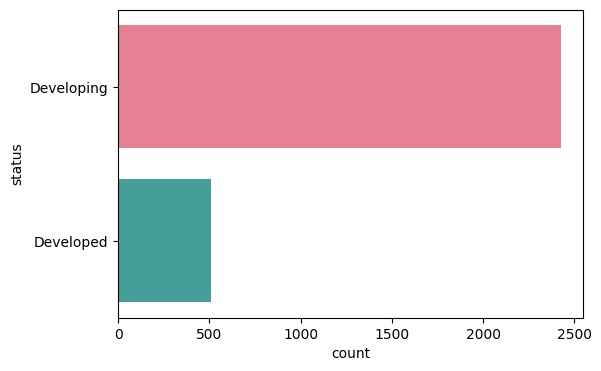

In [108]:
plt.figure(figsize=(6,4))
sns.countplot(data=wins_df, y= 'status', order=wins_df["status"].value_counts().index, palette= "husl")

In [109]:
# Count the status occurrences
status_counts = wins_df['status'].value_counts()

# Create the countplot figure using Plotly
fig = go.Figure(data=[
    go.Bar(
        y=status_counts.index,
        x=status_counts.values,
        orientation='h',
        marker=dict(
            color=['#33ADA4', '#F87188']
        )
    )
])

# Customize the figure layout
fig.update_layout(
    title='Status Count',
    xaxis=dict(
        title='Count',
        tickmode='linear',
        tick0=0,
        dtick=1000,
        showgrid=True,
        gridcolor='lightgray',
        showticklabels=True
    ),
    yaxis=dict(
        title='Status',
        showgrid=True,
        gridcolor='lightgray',
        showticklabels=True
    ),
    showlegend=False
)

fig.show()

In [110]:
fig = px.pie(wins_df, values = wins_df["status"].value_counts(), names =wins_df["status"].value_counts().index, color = df["status"].value_counts().index ,
             color_discrete_map={'Developing':'#33ADA4',
                                 'Developed':'#F87188',})
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
)
fig.show()

This two graphs, though simple, are important. The above display that the majority of our data comes from countries listed as 'Developing'.
It is likely that any model used will more accurately depict results for 'Developing' countries over 'Developed' countries as the majority of the data lies within countries that are 'Developing' rather than 'Developed'.


#### Uniform representation

This graphs are important because we have to make sure that certain countries are not being overrepresented.

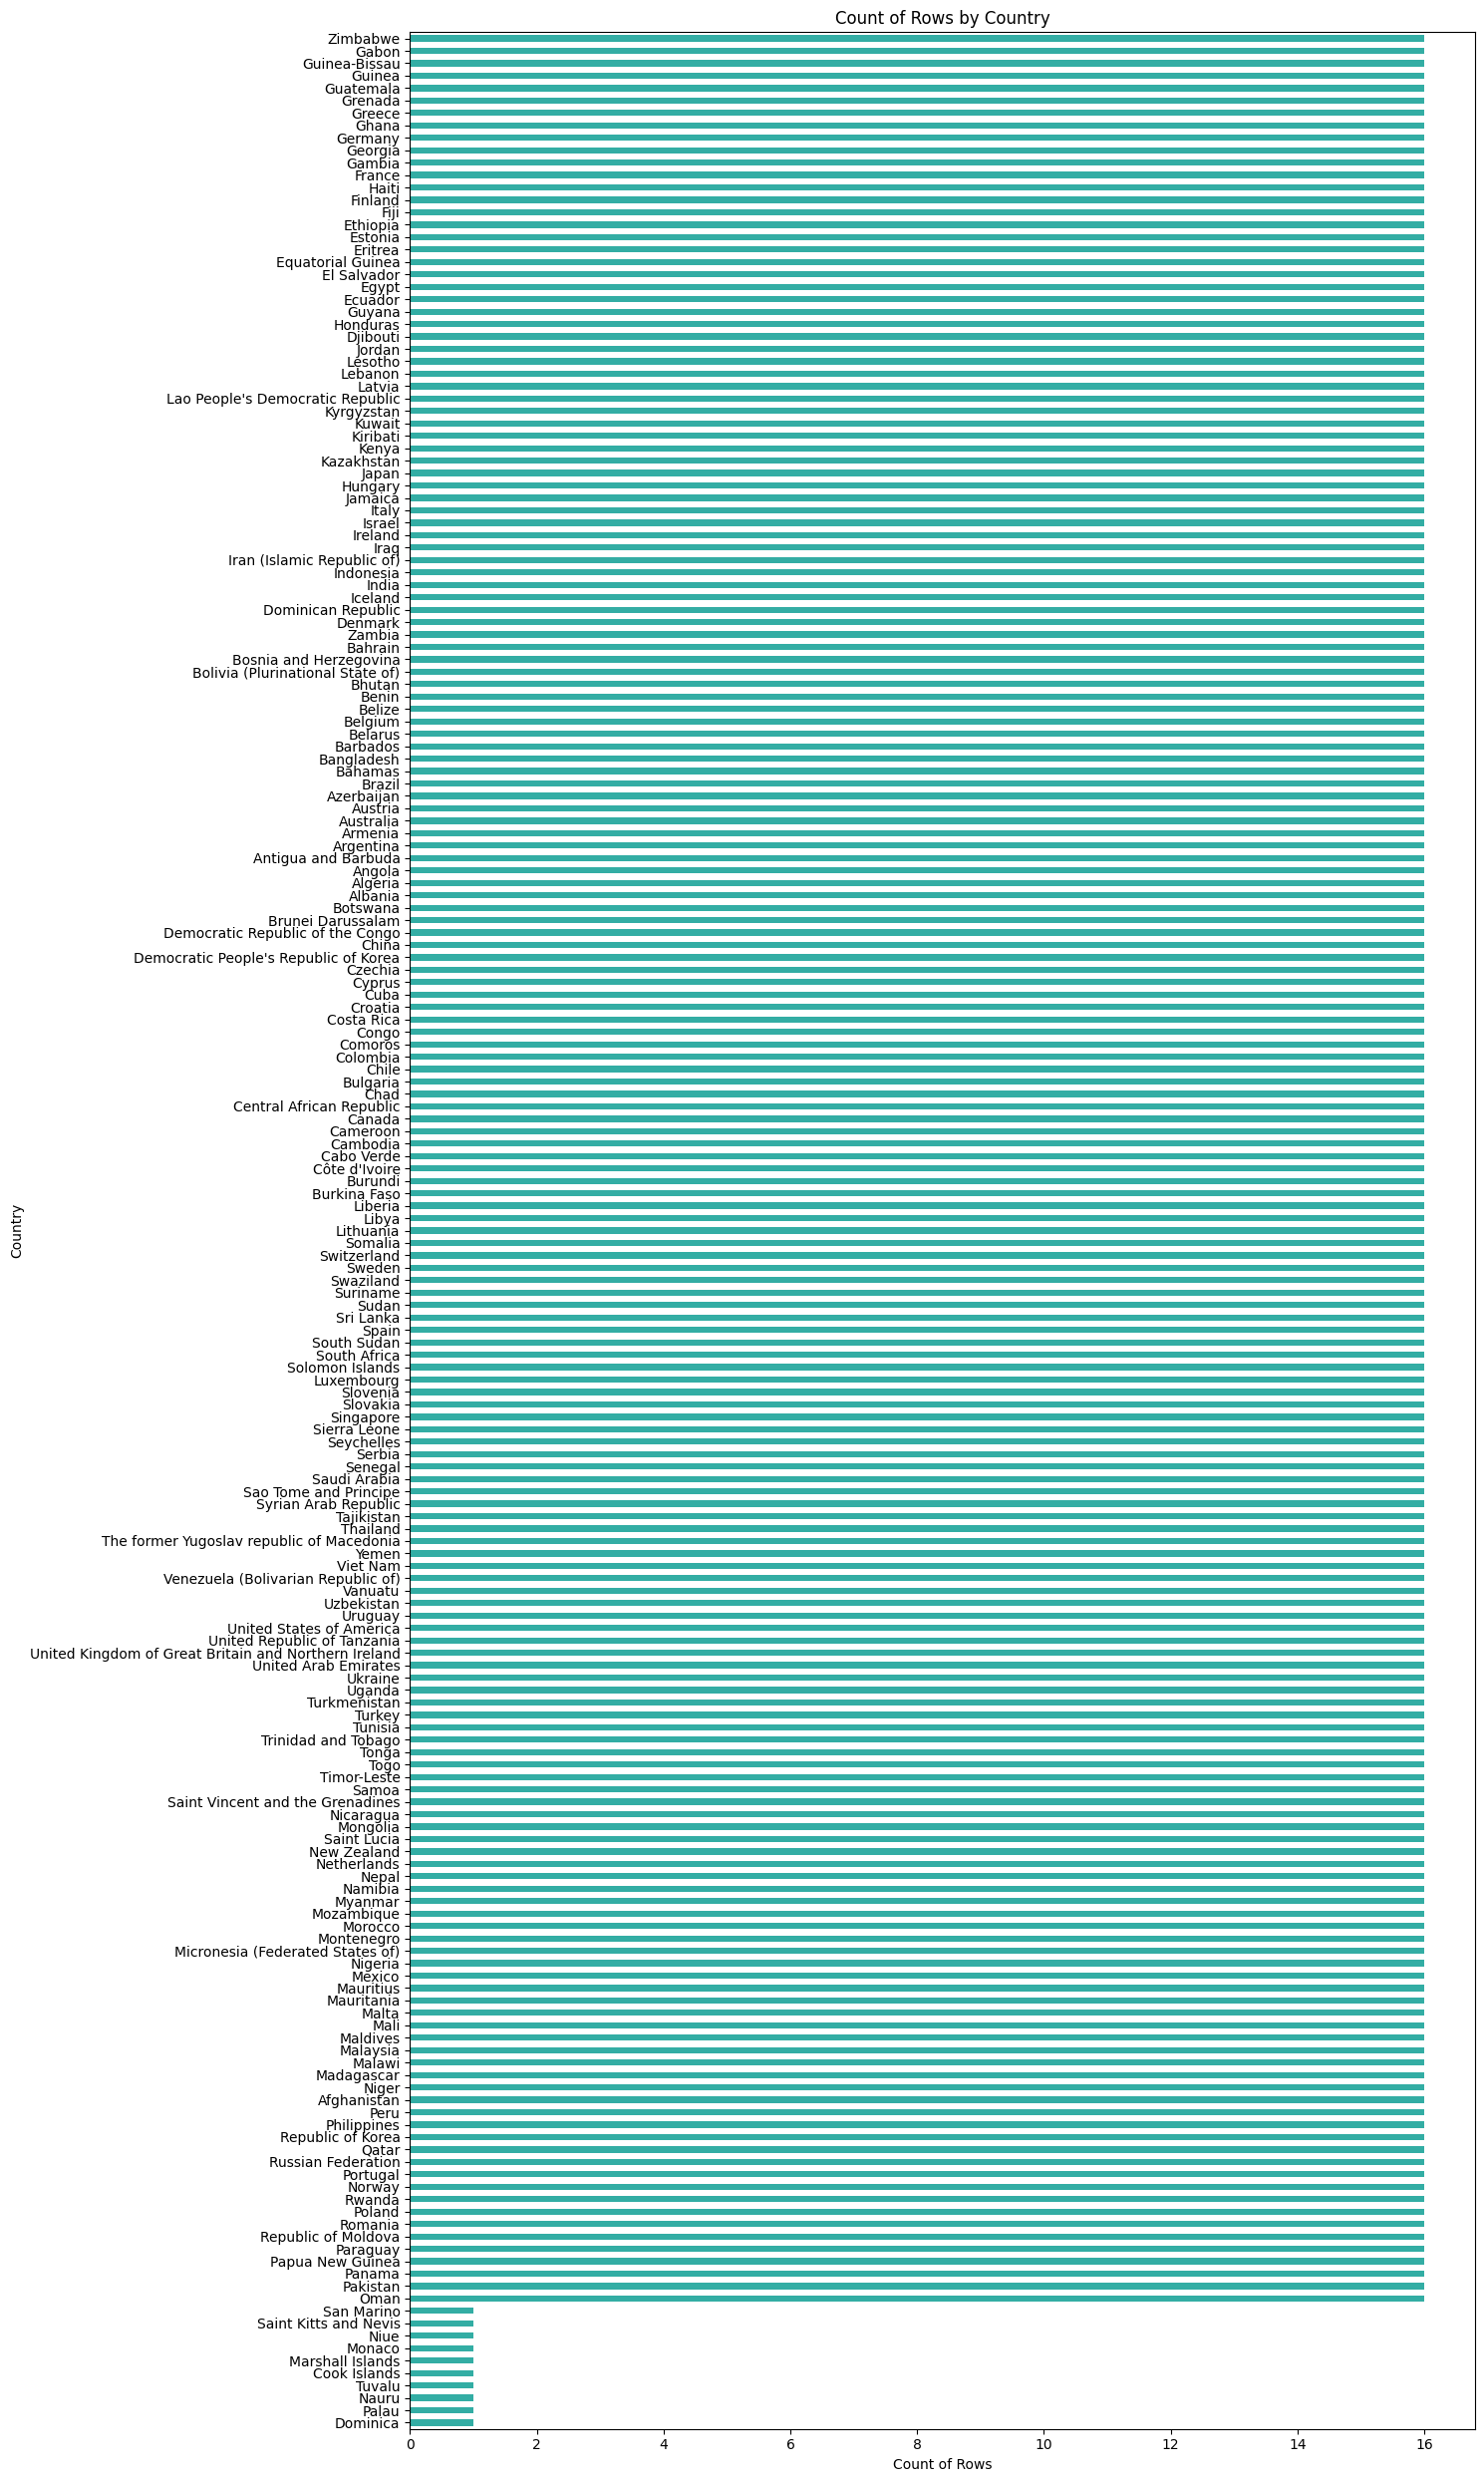

In [111]:
plt.figure(figsize=(15, 25))
wins_df.country.value_counts(ascending=True).plot(kind='barh', color = '#33ADA4')
plt.title('Count of Rows by Country')
plt.xlabel('Count of Rows')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

This graph displays that the mass majority of countries have 16 rows (16 years) worth of data. 

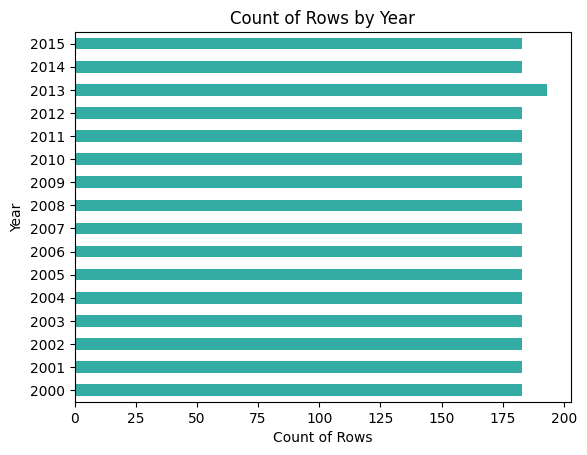

In [112]:
wins_df.year.value_counts().sort_index().plot(kind='barh', color = '#33ADA4')
plt.title('Count of Rows by Year')
plt.xlabel('Count of Rows')
plt.ylabel('Year')
plt.show()

This one display that each year has the same amount of rows, except for 2013, which contains 10 more rows than the rest (the countries with only one row from the prior graph's data must be from 2013 alone).

### Bivariate Analysis

#### Correlation and heatmap

The coorelation function and the heatmap can help in discovering the possible correlations between continous variables.

In order to have only numeric variables, we transfomr the categorical one 'status'. 

In [113]:
 # Replacing values
wins_df['status'].replace(['Developing', 'Developed'],[0, 1], inplace=True)

In [114]:
wins_df.corr()

year    status  life_expectancy  \
year                             1.000000 -0.001864         0.169796   
status                          -0.001864  1.000000         0.483121   
life_expectancy                  0.169796  0.483121         1.000000   
adult_mortality                 -0.070061 -0.330324        -0.704576   
infant_deaths                   -0.107370 -0.044171        -0.265798   
alcohol                         -0.047889  0.600647         0.405670   
percentage_expenditure           0.032807  0.420621         0.488440   
hepatitis_b                      0.181653  0.108657         0.356989   
measles                         -0.118772 -0.130744        -0.337887   
under-five_deaths               -0.115417 -0.070100        -0.322638   
polio                            0.120233  0.264765         0.579648   
total_expenditure                0.080705  0.302065         0.234167   
diphtheria                       0.151132  0.263514         0.581424   
hiv/aids                        -0.088913 -0.290242        -0.796939   
gdp                              0.143279  0.441921         0.516964   
population                       0.064619 -0.057646         0.012172   
thinness_10-19_years            -0.049728 -0.395916        -0.514966   
thinness_5-9_years              -0.050187 -0.396833        -0.512694   
income_composition_of_resources  0.224731  0.510650         0.792878   
schooling                        0.210745  0.508211         0.742306   

                                 adult_mortality  infant_deaths   alcohol  \
year                                   -0.070061      -0.107370 -0.047889   
status                                 -0.330324      -0.044171  0.600647   
life_expectancy                        -0.704576      -0.265798  0.405670   
adult_mortality                         1.000000       0.155353 -0.207900   
infant_deaths                           0.155353       1.000000 -0.106923   
alcohol                                -0.207900      -0.106923  1.000000   
percentage_expenditure                 -0.322933      -0.132212  0.375576   
hepatitis_b                            -0.223385      -0.211061  0.106561   
measles                                 0.219717       0.356873 -0.199096   
under-five_deaths                       0.191429       0.979956 -0.134980   
polio                                  -0.373179      -0.251690  0.271004   
total_expenditure                      -0.143014      -0.104477  0.310569   
diphtheria                             -0.374554      -0.257926  0.268434   
hiv/aids                                0.615406       0.157117 -0.195863   
gdp                                    -0.335618      -0.098757  0.414126   
population                              0.001868       0.201768 -0.034317   
thinness_10-19_years                    0.348871       0.227832 -0.450364   
thinness_5-9_years                      0.354784       0.234391 -0.441382   
income_composition_of_resources        -0.532785      -0.226254  0.487431   
schooling                              -0.476290      -0.241657  0.533070   

                                 percentage_expenditure  hepatitis_b  \
year                                           0.032807     0.181653   
status                                         0.420621     0.108657   
life_expectancy                                0.488440     0.356989   
adult_mortality                               -0.322933    -0.223385   
infant_deaths                                 -0.132212    -0.211061   
alcohol                                        0.375576     0.106561   
percentage_expenditure                         1.000000     0.106012   
hepatitis_b                                    0.106012     1.000000   
measles                                       -0.194687    -0.263595   
under-five_deaths                             -0.144073    -0.237499   
polio                                          0.270324     0.645079   
total_expenditure                         

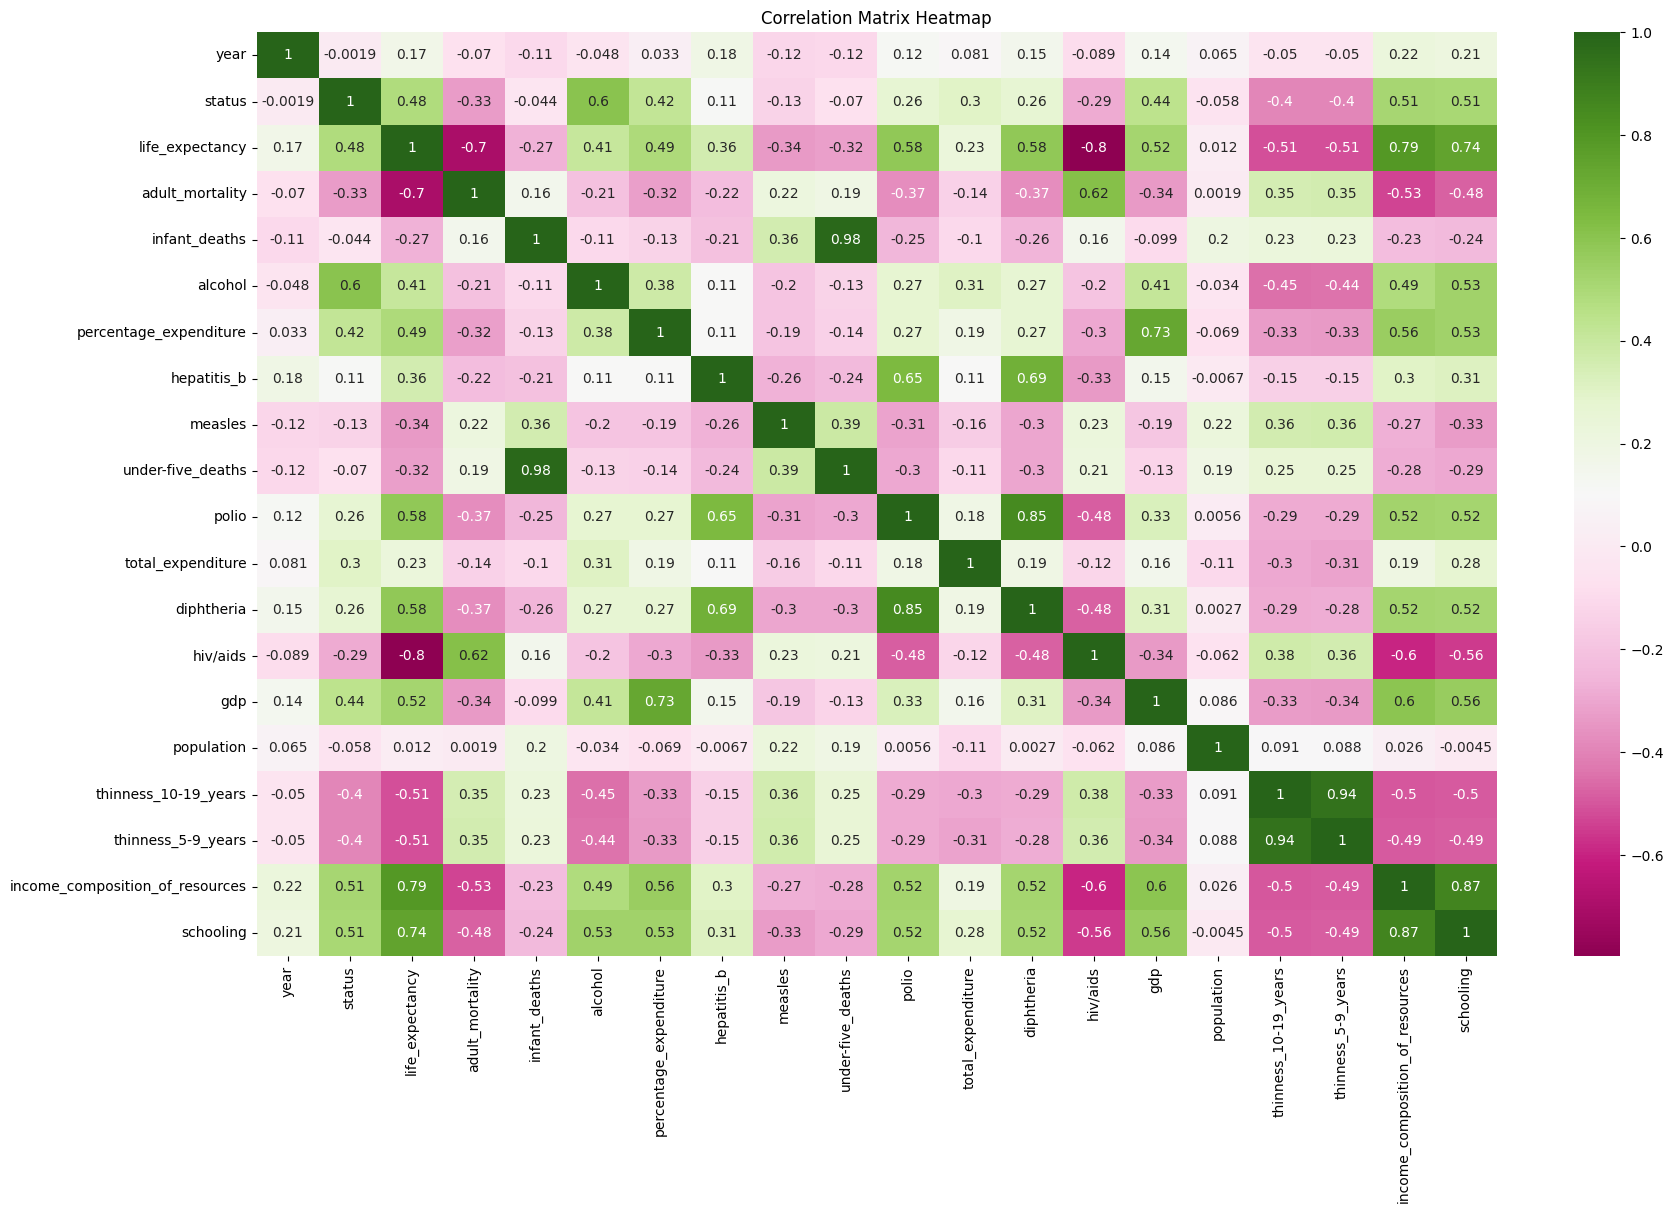

In [115]:
plt.figure(figsize=(20,12))
sns.heatmap(wins_df.corr(),annot=True, cmap='PiYG')
plt.title('Correlation Matrix Heatmap')
plt.show()

I use this scheme to interpret the values obtain:

<img src="/Users/emmatosato/Documents/UNI/Magistrale/Social_Research/corr_values.png" alt="Correlation values" style="height: 223px; width:522px;"/>


([Source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/#:~:text=A%20correlation%20coefficient%20of%20zero,between%20%E2%88%921%20and%20%2B1.))


From the above heatmap we can have these general takeaways:
- Life Expectancy (target variable) appears to be relatively highly correlated (negatively or positively) with:
    - Adult Mortality (negative)
    - HIV/AIDS (negative)
    - Income Composition of Resources (positive)
    - Schooling (positive)
- Infant deaths and Under Five deaths are extremely highly correlated
- Thinness of 5-9 Year olds rate and Thinness of 10-15 Year olds rate is extremely highly correlated
- Income Composition of Resources and Schooling are very highly correlated
- Polio vaccine rate and Diphtheria vaccine rate are very positively correlated
- Hepatitis B vaccine rate is relatively positively correlated with Polio and Diphtheria vaccine rates
- HIV/AIDS is relatively negatively correlated with Income Composition of Resources
- Percentage Expenditure and GDP are relatively highly correlated

#### Scatter plots

From numerical to categorical for visualizations goals

In [116]:
# Changing the values for a better visualiztion
wins_df['status'].replace([0, 1],['Developing', 'Developed'], inplace=True)

Scaling the values in the dataset

MEMO

It is important to note that correlation does not imply causation. While a high correlation suggests a strong statistical relationship between the two variables, it does not necessarily mean that one variable directly causes the other

##### Life Expectancy over Years 

This interactive plot shows country wise life expectancy over years

In [117]:
fig=px.line(wins_df.sort_values(by='year'),x='year',y='life_expectancy',animation_frame='country',animation_group='year',color='country',markers=True)
fig.update_layout(yaxis_range=[35, 90],showlegend=False, yaxis=dict(tickmode='linear', tick0=30, dtick=5)) # i set 35 because the min value was 35
fig.show()

Here we can see how life expectancy has changed over the years, considerig all the countries together.

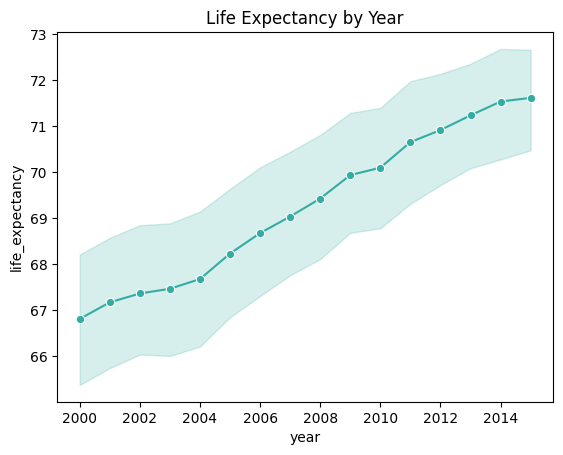

In [118]:
sns.lineplot(x = 'year', y = 'life_expectancy', data=wins_df, marker='o', color = '#33ADA4')
plt.title('Life Expectancy by Year')
plt.show()

There appears to definitely be a positive trend over time.

##### Life_Expectancy w.r.t Status 

Althought the correlation value is not so high for these 2 variables, we are still going to check the relation between the variable with a violin plot.
In fact, we can easily see that developing countries exhibit a wider spectrum of values, as far as life expectancy is concerned. While in more developed countries, these values are more established, in developing countries the situation is still unstable and malleable. 

In [119]:
fig=px.violin(wins_df,x='status',y='life_expectancy',color='status',box=True,title='Life expectancy Based on Countries status', 
              color_discrete_sequence=['#33ADA4', '#F87188'])
fig.show()

##### Life Expectancy w.r.t Adult Mortality 

When there is a high negative correlation between Life expectancy and Adult Mortality, it suggests that countries or regions with higher adult mortality rates tend to have lower life expectancies. In other words, higher adult mortality is associated with shorter life expectancy. This correlation may indicate that factors leading to higher adult mortality, such as :
- disease burden (hiv/aids, measles)
- inadequate healthcare systems (total_expenditure, percentage_expenditure)
- socioeconomic challenges (income_composition_of_resources, alcohol, gdp)
- immunization coverage (hepatitis_b, polio, diphtheria)
contribute to a decrease in life expectancy.

In [120]:
round(wins_df.corr().loc['life_expectancy']['adult_mortality'], 2)

-0.7

In [121]:
fig = px.scatter(wins_df,y='adult_mortality',x='life_expectancy',opacity=0.6,title='<b> Life Expectancy w.r.t Adult Mortality and Status', color = 'status',
                 color_discrete_map={'Developing': '#33ADA4', 'Developed': '#F87188'})
fig.show()

Here we can see how the hiv/aids factor can lead to increased adult mortality, and thus lower life expectancy (disease burden). 
Higher the level of deaths per 1000 live births caused by HIV/AIDS for people under 5, higher the fact that the country concerned is one with an higher level of adult mortality and low life expectancy.  

In [122]:
fig = px.scatter(wins_df,y='adult_mortality',x='life_expectancy',opacity=0.6,title='<b> Life Expectancy w.r.t Adult Mortality and Hiv/Aids', color = 'hiv/aids', 
                 color_continuous_scale=  'Tealrose')
fig.show()

Same reasoning for the Income composition of Resources (Socio-economical factor). We can see that most of the cases where mortality is high, life expectancy is low, and the country has also low Income composition of Resources.

In [123]:
fig = px.scatter(wins_df,y='adult_mortality',x='life_expectancy',opacity=0.6,title='<b> Life Expectancy w.r.t Adult Mortality and Income composition of Resources', color = 'income_composition_of_resources', 
                 color_continuous_scale=  'Tealrose')
fig.show()

##### Life Expectancy w.r.t HIV/AIDS and Status

All the things stated before hold for this graph, where we can see the strong negative correlation between life expectancy and HIV/AIDS. 
This means that as the prevalence of HIV/AIDS decreases, the life expectancy tends to increase. 

In [124]:
round(wins_df.corr().loc['life_expectancy']['hiv/aids'], 2)

-0.8

In [125]:
fig = px.scatter(wins_df,y='hiv/aids',x='life_expectancy',opacity=0.6,title='<b> Life Expectancy w.r.t HIV/AIDS and Status', color = 'status',
                 color_discrete_map={'Developing': '#33ADA4', 'Developed': '#F87188'})
fig.show()

##### Life Expectancy w.r.t Income Composition of Resources

The Income Composition of Resources is a measure of the distribution of income in a country and is here represented by the Human Development Index (HDI). It takes into account factors such as income inequality, access to education, and healthcare resources.

A high correlation between life expectancy and the Income Composition of Resources implies that countries with higher income equality, better access to education and healthcare, and more resources available to the population tend to have longer life expectancies. This is because higher income composition often translates to improved living standards, better healthcare services, and overall improved quality of life for the population, which can lead to better health outcomes and longer life expectancy.

The difference between developing and developed countries is alwasy the same.

In [126]:
round(wins_df.corr().loc['life_expectancy']['income_composition_of_resources'], 2)

0.79

In [127]:
fig = px.scatter(wins_df,y='income_composition_of_resources',x='life_expectancy',opacity=0.6,title='<b> Life Expectancy w.r.t Income Composition of Resources and Status', color = 'status',
                 color_discrete_map={'Developing': '#33ADA4', 'Developed': '#F87188'})
fig.show()

##### Life Expectancy w.r.t Schooling

As before, if the level of schooling or education in a population increases, the life expectancy tends to increase as well.

Education and life expectancy are closely interconnected in several ways:
- Improved Health Knowledge: Education provides individuals with knowledge about health, hygiene, and disease prevention. 
- Access to Healthcare: Higher levels of education are often associated with better access to healthcare services. 
- Socioeconomic Status: Education is often linked to higher socioeconomic status, which can positively impact health and life expectancy. People with higher education tend to have better job opportunities, higher income, and improved living conditions, all of which contribute to better health outcomes.
- Empowerment can lead to healthier lifestyle choices

In [128]:
round(wins_df.corr().loc['life_expectancy']['schooling'], 2)

0.74

In [129]:
fig = px.scatter(wins_df,y='schooling',x='life_expectancy',opacity=0.6,title='<b> Life Expectancy w.r.t Schooling and Status', color = 'status',
                 color_discrete_map={'Developing': '#33ADA4', 'Developed': '#F87188'})
fig.show()

##### Life_Expectancy vs Immunization like Hepatitis B, Polio and Diphtheria 

In [130]:
fig = px.scatter(wins_df,y='hepatitis_b',x='life_expectancy',opacity=0.6,title='<b>', color = 'status',
                 color_discrete_map={'Developing': '#33ADA4', 'Developed': '#F87188'})
fig.show()

In [131]:
fig = px.scatter(wins_df,y='polio',x='life_expectancy',opacity=0.6,title='<b>', color = 'status',
                 color_discrete_map={'Developing': '#33ADA4', 'Developed': '#F87188'})
fig.show()

In [132]:
fig = px.scatter(wins_df,y='diphtheria',x='life_expectancy',opacity=0.6,title='<b>', color = 'status',
                 color_discrete_map={'Developing': '#33ADA4', 'Developed': '#F87188'})
fig.show()

##### Income composition of resources w.r.t Schooling

In [133]:
round(wins_df.corr().loc['income_composition_of_resources']['schooling'], 2)

0.87

In [134]:
fig = px.scatter(wins_df,y='income_composition_of_resources',x='schooling',opacity=0.6, color = 'status',
                 color_discrete_map={'Developing': '#33ADA4', 'Developed': '#F87188'})
fig.show()

#### PCA

It may be useful to run a Principal Components Analysis (PCA) on this data to reduce the amount of dimensions (features). But there are a number of assumptions/requirements when it comes to PCA:

- Continuous data: the data used should be of a continuous type
- Outliers: PCA is sensitive to outliers, therefore outliers should not be present
- Sample size: the sample size should have between 5-10 samples per feature
- Correlation: there should be correlation between the features
- Linearity: it is assumed that relationships between features are linear
- Normalized data: the data is generally normally distributed

Firstly, PCA is an unsupervised technique, so the target variable is not needed and can be dropped.

In [135]:
# Copy of the dataset
feat_df = wins_df.copy()

# Dropping
feat_df.drop(columns='life_expectancy', inplace=True)

So we start adapting our dataset to this requirements. Firstly we remove the categorical variable 'country' and the year variables, because don't have significant differences among life expectancy.

In [136]:
feat_df.drop(columns=['country', 'year'], inplace=True)

Transform the categorical variable in a numeric one

In [137]:
feat_df['status'].replace(['Developing', 'Developed'],[0, 1], inplace=True)

Next i have to check the correlation values, and the variable that is not very correlated with any of the other is 'Population', so we are going to drop it.

In [138]:
feat_df.drop(columns=['population'], inplace=True)

Finally, we normalize the data

In [139]:
# Standardize the numeric features by scaling them
scaler = StandardScaler()
feat_df_std = scaler.fit_transform(feat_df)

Now the features set satisfies the following above assumptions: sample size, correlation, outliers, normalization and continuous data. The linearity assumption may not be true (as we seen in the Regression there may be nonlinear relationships, however we take linearity for granted in order to see how the PCA works).

We can proceed with the PCA without a fixed number of components, in order to find the optimal one.

In [140]:
# # Fitting for finding the n° of compoennts
sklearn_pca = PCA()
pca_components = sklearn_pca.fit_transform(feat_df_std)

The importance of each feature is reflected by the magnitude of the corresponding values in the eigenvectors (higher magnitude - higher importance)

Let's see first what amount of variance does each PC explain.

In [141]:
print('Explained variance by Principal Components:', sklearn_pca.explained_variance_ratio_)

Explained variance by Principal Components: [0.38708044 0.12478004 0.10011566 0.07062488 0.06278192 0.04811
 0.04269479 0.03754901 0.02916746 0.02170093 0.02030889 0.01978658
 0.01568297 0.00851495 0.00673712 0.00335956 0.00100478]


In [142]:
sum = 0
for i in range(10):
    temp = round(sklearn_pca.explained_variance_ratio_[i]*100, 2)
    sum += temp
print('Variance:', round(sum), '%')

Variance: 92 %


So, in order to capture at least 90% of the variance, 9 components are needed. This is with the assumption that the variables are linearly related as well. 
Let's see the scree plot.

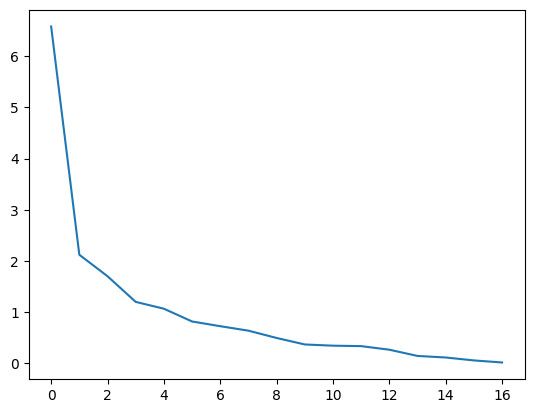

PC1 Explained Variance: 38.71%


In [143]:
plt.plot(sklearn_pca.explained_variance_)
plt.show()
print('PC1 Explained Variance:', str(round(sklearn_pca.explained_variance_ratio_[0]*100, 2))+'%')

Based on the scree plot above, it would suggest that only PC1 be kept, this is likely not a great idea as PC1 only accounts for about the 37% of the total variance of the variables.
In this case, perhaps more features are better then less features for the modelling, and looking at the plot we coluld use from 9 to 16 features.

So we can conclude that the dimensionality reduction method of PCA didn't seem to garner very useful results. It is likely that further transformation of the features should be done, but knowing which model will be used is easier to select the best set of feautures that have to be done

#### PCA - Continue

<bound method Figure.show of <Figure size 2000x1200 with 2 Axes>>

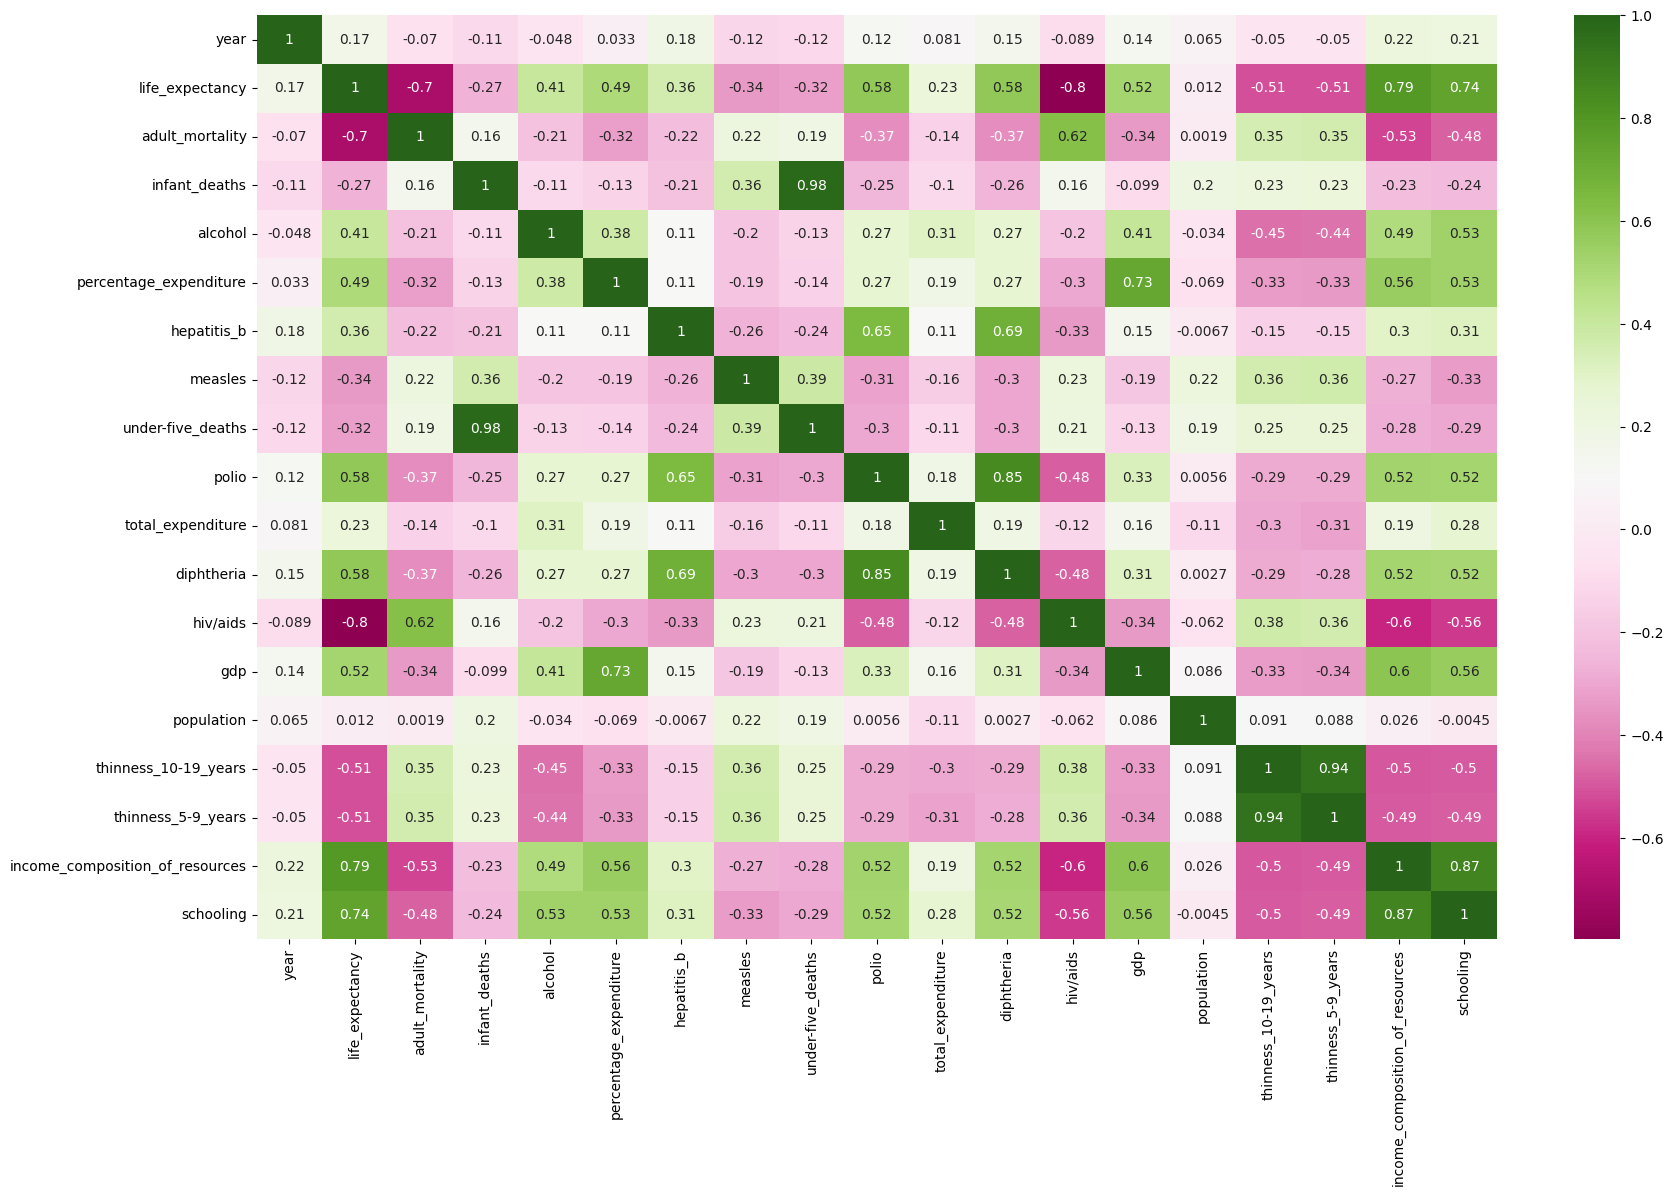

In [144]:
fig = plt.figure(figsize=(20,12))
sns.heatmap(wins_df.corr(),annot=True, cmap='PiYG')
fig.show

Before applying the PCA, the selection of the best features can be done by removing the 'highly correlated to one another' variables. The aim was to keep only the variables which was more highly correlated with the target.
Infact, in some situations, removing highly correlated variables before PCA can be useful if the goal is to reduce multicollinearity or remove redundant information. Highly correlated variables can introduce instability or noise in the PCA results, as they may dominate the principal components' contribution. By removing highly correlated variables, you can focus on capturing unique and independent information in the remaining variables.

Checking the heatmap following are very/extremely highly correlated (correlation > .7 or correlation < -.7):
- Infant Deaths/Under Five Deaths (drop Infant Deaths - Under Five Deaths is more highly correlated to Life Expectancy)
- GDP/Percentage Expenditure (drop Percentage Expenditure - GDP is more higher correlated to Life Expectancy)
- Polio/Diphtheria (drop Polio - Diphtheria is more highly correlated to Life Expectancy)
- Thinness 5-9/Thinness 10-19 (drop Thinness 10-19 as correlations to other variables are slightly higher)
- Income Composition of Resources/Schooling (drop Schooling - Income Composition of Resources is more highly correlated with Life Expectancy)

Then we consider to remove also the 'population' for the reason stated before and the 'status' because is categorical and even numerical, it is not so relevant for the target.

By reasoning in this way, we can consider these 12 variables:
1. Adult Mortality
2. Alcohol
3. Hepatitis B
4. Measles
5. Under-Five Deaths
5. Total Expenditure
7. Diphtheria
8. HIV/AIDS
9. GDP
10. Thinness 5-9 Years
11. Income Composition Of Resources
12. Status


In [145]:
# Copy of the dataset
feat_df = wins_df.copy()

# Converting
feat_df['status'].replace(['Developing', 'Developed'],[0, 1], inplace=True)

# Select the relevant features
variables = ['adult_mortality',
             'alcohol',
             'hepatitis_b',
             'measles',
             'under-five_deaths',
             'total_expenditure',
             'diphtheria',
             'hiv/aids',
             'thinness_5-9_years',
             'income_composition_of_resources',
             'status'
            ]
feat_df = feat_df[variables]

# Standardize the numeric features by scaling them
scaler = StandardScaler()
feat_df_std = scaler.fit_transform(feat_df)

# Fitting for finding the n° of compoennts
sklearn_pca = PCA()
pca_components = sklearn_pca.fit_transform(feat_df_std)

# Sum of variance by components
sum = 0
for i in range(10):
    temp = round(sklearn_pca.explained_variance_ratio_[i]*100, 2)
    sum += temp
    print('Number of component', i, '- Variance:', round(sum), '%')

# Perform PCA for finding the components
num_components = 9
pca = PCA(n_components=num_components)
pca_components = pca.fit_transform(feat_df_std)

Number of component 0 - Variance: 38 %
Number of component 1 - Variance: 51 %
Number of component 2 - Variance: 62 %
Number of component 3 - Variance: 70 %
Number of component 4 - Variance: 77 %
Number of component 5 - Variance: 83 %
Number of component 6 - Variance: 88 %
Number of component 7 - Variance: 91 %
Number of component 8 - Variance: 95 %
Number of component 9 - Variance: 98 %


#### Multiple Linear regression

Firstly the Multi linear regression, helps us understand the relationships between multiple independent variables and a dependent variable, allowing us to identify which variables have significant impacts on the outcome. Secondly, it enables us to make predictions and estimate the effects of changes in the independent variables on the dependent variable. Lastly, by evaluating the statistical significance of the coefficients, we can determine the strength of the relationships and identify the most influential predictors in the model. Overall, multiple linear regression is a powerful tool for understanding, predicting, and interpreting complex relationships in the data.

The code below is valid for all the regressions: we are selecting the X matrix, that is composed by all the independent variables needed for predicting the target variable. In the y variable we memorize the target feature, in order to compare the predicted results with the real ones.

In [146]:
# Define the feature matrix X by selecting the columns (features) you want to include
X = wins_df.copy()
X.drop(['country', 'life_expectancy'],inplace=True,axis=1)

# Converting the categorical to numerical
X['status'].replace(['Developing', 'Developed'],[0, 1], inplace=True)

# Define the target variable y
y = wins_df['life_expectancy']

The actual model

In [147]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", rmse)

r2 = r2_score(y_test,y_pred)
print("R^2 score:" , r2)

mae = mean_absolute_error(y_test,y_pred)
print("The Mean Absolute Error of our Model is {}".format(round(mae, 2)))


Mean Squared Error: 12.611897812886562
R^2 score: 0.8633801667008252
The Mean Absolute Error of our Model is 2.6


With an MSE of 14.157 and an R-squared score of 0.849, it can be inferred that the multiple linear regression model has reasonably good predictive performance. The MSE indicates the average prediction error, while the R-squared score suggests that a significant portion of the variance in the target variable is explained by the model's independent variables

In [148]:
# ------------------------------------------------------------ with PCA ---------------------------------------------------------------------
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_components, y, test_size=0.3, random_state=42)

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", rmse)

r2 = r2_score(y_test,y_pred) * 100
print("R^2 score:" , r2)

mae = mean_absolute_error(y_test,y_pred)
print("The Mean Absolute Error of our Model is {}".format(round(mae, 2)))


Mean Squared Error: 12.977290173835925
R^2 score: 85.94220119344041
The Mean Absolute Error of our Model is 2.64


In [149]:
# Create a scatter plot for Actual vs Predicted
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers', name='Actual vs Predicted',
                         marker=dict(color='#33ADA4')))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines', line=dict(color='red', dash='dash'), name='Perfect Prediction Line'))

# Set axes labels and title
fig.update_layout(xaxis_title='Actual Values', yaxis_title='Predicted Values', title='Actual vs Predicted Multiple Linear Regression')

# Show the plot
fig.show()

To evaluate the statistical significance of the coefficients in multiple linear regression and so to identify the most influential predictors in the model, we can assess the p-values associated with each coefficient. A lower p-value suggests that the coefficient is statistically significant and that it has a significant impact on the dependent variable (p-value below 0.05)

In [150]:
import statsmodels.api as sm

# Add a constant column to X for the intercept
X_with_intercept = sm.add_constant(X)

# Fit the ordinary least squares (OLS) model
model_ols = sm.OLS(y, X_with_intercept).fit()

# Access the p-values
p_values = model_ols.pvalues[1:]  # Exclude the intercept term

In [151]:
# Dictionary of variable names and p-values
p_values = {
    'year': p_values[0],
    'status': p_values[1],
    'adult_mortality': p_values[2],
    'infant_deaths': p_values[3],
    'alcohol': p_values[4],
    'percentage_expenditure': p_values[5],
    'hepatitis_b': p_values[6],
    'measles': p_values[7],
    'under_five_deaths': p_values[8],
    'polio': p_values[9],
    'total_expenditure': p_values[10],
    'diphtheria': p_values[11],
    'hiv_aids': p_values[12],
    'gdp': p_values[13],
    'population': p_values[14],
    'thinness_10_19_years': p_values[15],
    'thinness_5_9_years': p_values[16],
    'income_composition_of_resources': p_values[17],
    'schooling': p_values[18]
}

# Check if each p-value is below 0.05 and print the corresponding variable name
for variable, p_value in p_values.items():
    if p_value < 0.05:
        print(f"The p-value for variable '{variable}' is below 0.05")
    else:
        print(f"The p-value for variable '{variable}' is not below 0.05")

The p-value for variable 'year' is below 0.05
The p-value for variable 'status' is below 0.05
The p-value for variable 'adult_mortality' is below 0.05
The p-value for variable 'infant_deaths' is not below 0.05
The p-value for variable 'alcohol' is below 0.05
The p-value for variable 'percentage_expenditure' is below 0.05
The p-value for variable 'hepatitis_b' is below 0.05
The p-value for variable 'measles' is below 0.05
The p-value for variable 'under_five_deaths' is below 0.05
The p-value for variable 'polio' is below 0.05
The p-value for variable 'total_expenditure' is below 0.05
The p-value for variable 'diphtheria' is below 0.05
The p-value for variable 'hiv_aids' is below 0.05
The p-value for variable 'gdp' is not below 0.05
The p-value for variable 'population' is not below 0.05
The p-value for variable 'thinness_10_19_years' is not below 0.05
The p-value for variable 'thinness_5_9_years' is below 0.05
The p-value for variable 'income_composition_of_resources' is below 0.05
The 

In [152]:
# Define the feature matrix X by selecting the columns (features) you want to include
X_p_value = wins_df.copy()
X_p_value.drop(['country', 'life_expectancy', 'infant_deaths', 'gdp' , 'thinness_10-19_years', 'population'],inplace=True,axis=1)

# Converting the categorical to numerical
X_p_value['status'].replace(['Developing', 'Developed'],[0, 1], inplace=True)

# Define the target variable y
y = wins_df['life_expectancy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_p_value, y, test_size=0.3, random_state=42)

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", rmse)

r2 = r2_score(y_test,y_pred) * 100
print("R^2 score:" , r2)

mae = mean_absolute_error(y_test,y_pred)
print("The Mean Absolute Error of our Model is {}".format(round(mae, 2)))


Mean Squared Error: 12.619694028047611
R^2 score: 86.3295713303607
The Mean Absolute Error of our Model is 2.6


However, applying regression with the significant characteristics as independent variables, the mse value and R^2 do not change (in fact, they get worse). 

I also tried using only the variables with which the target is most correlated, but the results are worse than using all previously selected variables.

#### Ridge and Lasso Regression

Ridge Regression and Lasso Regression are both regularization techniques used in linear regression to prevent overfitting and improve model performance.

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X_p_value, y, test_size=0.3, random_state=42)

ridge_model=Ridge()
lasso_model=Lasso(alpha=0.00000001)

lasso_model.fit(X_train,y_train)
ridge_model.fit(X_train,y_train)

y_pred1 = ridge_model.predict(X_test)
y_pred2 = lasso_model.predict(X_test)

# Evaluate the model
rmse1 = mean_squared_error(y_test, y_pred1)
rmse2 = mean_squared_error(y_test, y_pred2)

R2_1 = r2_score(y_test,y_pred1) * 100
R2_2 = r2_score(y_test,y_pred2)* 100 

mae1 = mean_absolute_error(y_test,y_pred1)
mae2 = mean_absolute_error(y_test,y_pred2)

print("Ridge regression")
print("Mean Squared Error:", rmse1)
print("R^2 score:" , R2_1)
print("The Mean Absolute Error of our Model is {}".format(round(mae1, 2)))

print("\Lasso regression")
print("Mean Squared Error:", rmse2)
print("R^2 score:" , R2_2)
print("The Mean Absolute Error of our Model is {}".format(round(mae2, 2)))


Ridge regression
Mean Squared Error: 12.550554452710978
R^2 score: 86.40446757037952
The Mean Absolute Error of our Model is 2.6
\Lasso regression
Mean Squared Error: 12.619693914875226
R^2 score: 86.32957145295599
The Mean Absolute Error of our Model is 2.6


In [154]:
# Create subplots 
fig = make_subplots(rows=1, cols=2, subplot_titles=('Ridge Regression Model', 'Lasso Regression Model'))

# Scatter plot for Model 1
fig.add_trace(go.Scatter(x=y_test, y=y_pred1, mode='markers', name='Ridge Regression Model',
                         marker=dict(color='#33ADA4')), row=1, col=1)

# Scatter plot for Model 2
fig.add_trace(go.Scatter(x=y_test, y=y_pred2, mode='markers', name='Ridge Regression Model',
                         marker=dict(color='#F87188')), row=1, col=2)

# Perfect Prediction Line for both subplots
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines', line=dict(color='red', dash='dash'), name='Perfect Prediction Line'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines', line=dict(color='red', dash='dash'), name='Perfect Prediction Line'),
                         row=1, col=2)

# Set axes labels and title
fig.update_xaxes(title_text='Actual Values', row=1, col=1)
fig.update_xaxes(title_text='Actual Values', row=1, col=2)
fig.update_yaxes(title_text='Predicted Values', row=1, col=1)
fig.update_yaxes(title_text='Predicted Values', row=1, col=2)
fig.update_layout(title='Ridge and Lasso Actual vs Predicted', showlegend=False)

# Show the plot
fig.show()

#### Polynomial regression

Polynomial Regression is a variation of linear regression that allows us to model nonlinear relationships between the independent variables and the dependent variable. Instead of fitting a straight line, Polynomial Regression fits a polynomial equation to the data, allowing for more flexible and curved relationships.

In [155]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_p_value, y, test_size=0.2, random_state=42)

# Create a PolynomialFeatures object with the degree of polynomial you want
degree = 2  # Change this to the desired degree of the polynomial
poly = PolynomialFeatures(degree=degree)

# Transform the original features into polynomial features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit the linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model performance
rmse = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test,y_pred)

print(f"Mean Squared Error: {rmse:.4f}")
print(f"R^2 score: {R2:.4f}")
print(f"Mae: {mae:.2f}")

Mean Squared Error: 6.3472
R^2 score: 92.6416
Mae: 1.78


The results of the Polynomial regression are a little better, and they may mean that nonlinear relationships exist between the independent variables and the dependent variable.

In [156]:
# Create a scatter plot for Actual vs Predicted
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers', name='Actual vs Predicted',
                         marker=dict(color='#33ADA4')))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines', line=dict(color='red', dash='dash'), name='Perfect Prediction Line'))

# Set axes labels and title
fig.update_layout(xaxis_title='Actual Values', yaxis_title='Predicted Values', title='Actual vs Predicted Polynomial Regression')

# Show the plot
fig.show()

Here below the code for selecting the optimal degree

In [157]:
'''
for d in range(5):
    # Create a PolynomialFeatures object with the degree of polynomial you want
    degree = d  # Change this to the desired degree of the polynomial
    poly = PolynomialFeatures(degree=degree)

    # Transform the original features into polynomial features
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Create and fit the linear regression model on the polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_poly)

    # Evaluate the model performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Degree: ", degree)
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R^2 score: {r2:.4f}")
'''

'\nfor d in range(5):\n    # Create a PolynomialFeatures object with the degree of polynomial you want\n    degree = d  # Change this to the desired degree of the polynomial\n    poly = PolynomialFeatures(degree=degree)\n\n    # Transform the original features into polynomial features\n    X_train_poly = poly.fit_transform(X_train)\n    X_test_poly = poly.transform(X_test)\n\n    # Create and fit the linear regression model on the polynomial features\n    model = LinearRegression()\n    model.fit(X_train_poly, y_train)\n\n    # Make predictions on the test set\n    y_pred = model.predict(X_test_poly)\n\n    # Evaluate the model performance\n    mse = mean_squared_error(y_test, y_pred)\n    r2 = r2_score(y_test, y_pred)\n\n    print("Degree: ", degree)\n    print(f"Mean Squared Error: {mse:.4f}")\n    print(f"R^2 score: {r2:.4f}")\n'

#### Decision Tree Regression

Decision Tree Regression is a non-parametric supervised learning algorithm used for regression tasks. It works by recursively partitioning the data into subsets based on the values of the features, creating a tree-like structure. Each internal node represents a test on a specific feature, and each leaf node represents a prediction. The goal is to split the data in a way that minimizes the impurity or maximizes the information gain at each step.

Random Forest Regression is an ensemble learning method that combines multiple decision trees to make predictions. It works by creating a set of decision trees and aggregating their predictions to produce a more robust and accurate result. The randomness reduces overfitting and improves generalization. The final prediction is typically the average (or weighted average) of the predictions from all the trees. 

In [158]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_p_value, y, test_size=0.2, random_state=42)

# Decision Tree Regression
# Create and fit the Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree model performance
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree) * 100

print("Decision Tree Regression")
print(f"Mean Squared Error: {mse_decision_tree:.4f}")
print(f"R^2 score: {r2_decision_tree:.4f}")

# Random Forest Regression
# Create and fit the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate the Random Forest model performance
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest) * 100

print("\nRandom Forest Regression")
print(f"Mean Squared Error: {mse_random_forest:.4f}")
print(f"R^2 score: {r2_random_forest:.4f}")

Decision Tree Regression
Mean Squared Error: 7.0677
R^2 score: 91.8062

Random Forest Regression
Mean Squared Error: 3.3759
R^2 score: 96.0862


In [159]:
# Create subplots for Actual vs Predicted (Model 1) and Actual vs Predicted (Model 2)
fig = make_subplots(rows=1, cols=2, subplot_titles=('Decision Tree Regression Model', 'Random Forest Regression Model'))

# Scatter plot for Model 1
fig.add_trace(go.Scatter(x=y_test, y=y_pred_decision_tree, mode='markers', name='Decision Tree model',
                         marker=dict(color='#33ADA4')), row=1, col=1)

# Scatter plot for Model 2
fig.add_trace(go.Scatter(x=y_test, y=y_pred_random_forest, mode='markers', name='Random Forest model',
                         marker=dict(color='#F87188')), row=1, col=2)

# Perfect Prediction Line for both subplots
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines', line=dict(color='red', dash='dash'), name='Perfect Prediction Line'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines', line=dict(color='red', dash='dash'), name='Perfect Prediction Line'),
                         row=1, col=2)

# Set axes labels and title
fig.update_xaxes(title_text='Actual Values', row=1, col=1)
fig.update_xaxes(title_text='Actual Values', row=1, col=2)
fig.update_yaxes(title_text='Predicted Values', row=1, col=1)
fig.update_yaxes(title_text='Predicted Values', row=1, col=2)
fig.update_layout(title='Decision Tree and Random Forest Actual vs Predicted', showlegend=False)

# Show the plot
fig.show()

The results with Decision Tree Regressor and Random Forest Regressor might be better compared to simple linear regression because these models have greater flexibility to capture nonlinear relationships between the features and the target variable.
Here below some reasons for the better performance:
- Nonlinear relationships: In real-world datasets, the relationships between the features and the target variable are often nonlinear. Decision Tree Regressor and Random Forest Regressor can handle nonlinear relationships more effectively than linear regression.
- Interactions: Decision Tree Regressor and Random Forest Regressor can capture interactions between features, which can significantly impact the target variable.
- Ensemble learning: Random Forest Regressor is an ensemble model that combines multiple decision trees, reducing overfitting and improving generalization.
- Ability to learn complex patterns: Decision Tree Regressor and Random Forest Regressor can learn complex patterns and capture interactions between multiple features, making them more suitable for datasets with high-dimensional feature spaces.


### K-Means

In [160]:
# A copy of the dataset
k_means_df = wins_df.copy()

# Converting the categorical variables
k_means_df['status'].replace(['Developing', 'Developed'],[0, 1], inplace=True)
labels = k_means_df['status']

I want to know which are the most correlated variables to the 'status' features, in order to select these ones for the k-means

In [161]:
k_means_df.corr()['status'].sort_values()

thinness_5-9_years                -0.396833
thinness_10-19_years              -0.395916
adult_mortality                   -0.330324
hiv/aids                          -0.290242
measles                           -0.130744
under-five_deaths                 -0.070100
population                        -0.057646
infant_deaths                     -0.044171
year                              -0.001864
hepatitis_b                        0.108657
diphtheria                         0.263514
polio                              0.264765
total_expenditure                  0.302065
percentage_expenditure             0.420621
gdp                                0.441921
life_expectancy                    0.483121
schooling                          0.508211
income_composition_of_resources    0.510650
alcohol                            0.600647
status                             1.000000
Name: status, dtype: float64

In [162]:
# Select the Features
sf = ['income_composition_of_resources', 'life_expectancy']
k_means_df = k_means_df[sf]

# Standardize the data
scaler = StandardScaler()
k_means_df = scaler.fit_transform(k_means_df)

# Assuming the optimal k is 2 (developed and non-developed)
k = 2

# Apply k-means clustering with the optimal k
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = pd.Series(kmeans.fit_predict(k_means_df))


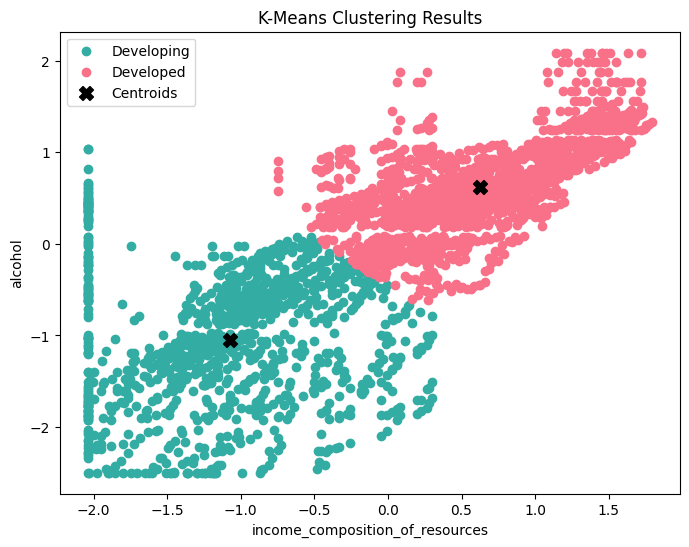

In [163]:
# Visualize the clusterization
plt.figure(figsize=(8, 6))
plt.scatter(k_means_df[clusters == 0][:, 0], k_means_df[clusters == 0][:, 1], c='#33ADA4', label='Developing')
plt.scatter(k_means_df[clusters == 1][:, 0], k_means_df[clusters == 1][:, 1], c='#F87188', label='Developed')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', marker='X', label='Centroids')
plt.xlabel('income_composition_of_resources')
plt.ylabel('alcohol')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()


In [164]:
# Plotting 
fig = px.scatter(wins_df,y='life_expectancy',x='income_composition_of_resources',opacity=0.6, color = 'status',
                 color_discrete_map={'Developing': '#33ADA4', 'Developed': '#F87188'})
fig.show()

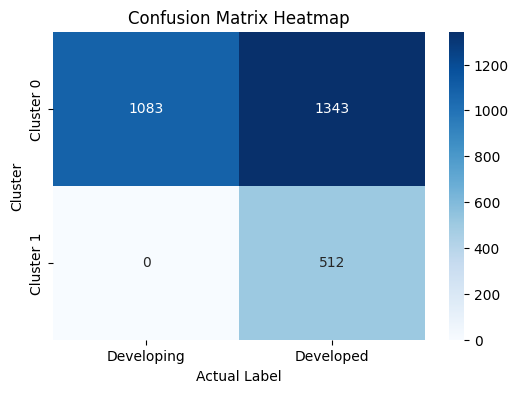

In [165]:
# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(labels, clusters), annot=True, fmt='d', cmap='Blues', xticklabels=['Developing', 'Developed'], yticklabels=['Cluster 0', 'Cluster 1'])
plt.xlabel('Actual Label')
plt.ylabel('Cluster')
plt.title('Confusion Matrix Heatmap')
plt.show()


- Top left cell (TP): Represents the number of correctly classified positive instances.
- Top right cell (FP): Represents the number of instances that are predicted as positive but are actually negative.
- Bottom left cell (FN): Represents the number of instances that are predicted as negative but are actually positive.
- Bottom right cell (TN): Represents the number of correctly classified negative instances.


## Conclusion

During the exploration of the dataset, the initial questions and additional queries were answered. We can therefore conclude that different aspects different aspects influence people's life expectancy, and how some of these factors are also interrelated.
It is therefore possible to rely on predictive models based, for example, on regression, to support and guide research and studies in this field.